In [1]:
import pandas as pd
import os
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
from datetime import datetime 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression # for building a linear regression model
from pyearth import Earth
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
import pygam as gam
from pygam import LinearGAM,s,f
from statsmodels.gam.api import GLMGam, BSplines
import gammy 
from gammy.utils import pipe
import sympy

# NOTE: Used repetitively in defining model terms!
from gammy.arraymapper import x

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rcParams.update({'font.size': 20})

df= pd.read_csv('pip.csv')

df= df.set_index(pd.DatetimeIndex(df['Date']))
df.index.names = ["Date"]
df=df.drop(columns=['Date'])
display(df)

dft=df[['volatility_index', 'peak', 'through', 'contraction', 'expansion',
       'HPI', 'GDP', 'unemp', 'lag_vol', 'lag_house', 'Eq2gdp', 'all_cases',
       'settled_cases', 'ongoing_cases', 'dismissed_cases', 'inflation']]

,volatility_index,peak,through,contraction,expansion,HPI,GDP,unemp,lag_vol,lag_house,Eq2gdp,all_cases,settled_cases,ongoing_cases,dismissed_cases,inflation,growth_all,growth_settled,growth_unemp,growth_GDP
Date,,,,,,,,,,,,,,,,,,,,
1996-02-29,17.04,0.0,0.0,0.0,1.0,81.403,99.295633,5.5,19.460000,116.918000,0.849422,20,13,0,7,2.26,0.597837,0.619039,-0.018019,0.000393
1996-03-31,18.88,0.0,0.0,0.0,1.0,81.669,99.364011,5.5,17.010000,117.931000,0.850484,14,11,0,3,2.26,-0.356675,-0.167054,0.000000,0.000688
1996-04-30,15.83,0.0,0.0,0.0,1.0,82.128,99.446837,5.6,16.950000,119.209000,0.869609,13,7,0,6,2.26,-0.074108,-0.451985,0.018019,0.000833
1996-05-31,16.07,0.0,0.0,0.0,1.0,82.605,99.525036,5.6,18.110000,120.788000,0.869948,23,20,0,3,2.23,0.570545,1.049822,0.000000,0.000786
1996-06-30,13.68,0.0,0.0,0.0,1.0,83.052,99.583258,5.3,17.140000,122.332000,0.920656,7,4,0,3,2.25,-1.189584,-1.609438,-0.055060,0.000585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,24.46,0.0,0.0,0.0,1.0,221.655,93.909374,10.2,18.630525,277.063839,1.134864,22,1,5,16,1.87,0.893818,0.000000,-0.084557,0.018078
2020-08-31,26.41,0.0,0.0,0.0,1.0,224.149,95.580060,8.4,23.962027,353.306813,1.766115,18,0,7,11,1.89,-0.200671,0.000000,-0.194156,0.017634
2020-09-30,26.37,0.0,0.0,0.0,1.0,226.824,95.737110,7.8,19.805347,249.567636,1.153448,2,0,2,0,1.92,-2.197225,0.000000,-0.074108,0.001642


In [74]:
a = dft['dismissed_cases'].sum()
c = dft['settled_cases'].sum()
b = dft['ongoing_cases'].sum()
d = a+b+c

In [541]:
reduced_form, inds = sympy.Matrix(data.values).rref()
inds

(0, 1, 2, 3, 4, 5, 6, 7, 8)

In [542]:
matrix = data.values

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[0]):
        if i != j:
            inner_product = np.inner(
                matrix[:,i],
                matrix[:,j]
            )
            norm_i = np.linalg.norm(matrix[:,i])
            norm_j = np.linalg.norm(matrix[:,j])

            print ('I: '), matrix[:,i]
            print ('J: '), matrix[:,j]
            print ('Prod: '), inner_product
            print( 'Norm i: '), norm_i
            print ('Norm j: '), norm_j
            if np.abs(inner_product - norm_j * norm_i) < 1E-5:
                print ('Dependent')
            else:
                print ('Independent')

I: 
J: 
Prod: 
Norm i: 
Norm j: 
Independent
I: 
J: 
Prod: 
Norm i: 
Norm j: 
Independent
I: 
J: 
Prod: 
Norm i: 
Norm j: 
Independent
I: 
J: 
Prod: 
Norm i: 
Norm j: 
Independent
I: 
J: 
Prod: 
Norm i: 
Norm j: 
Independent
I: 
J: 
Prod: 
Norm i: 
Norm j: 
Independent
I: 
J: 
Prod: 
Norm i: 
Norm j: 
Independent
I: 
J: 
Prod: 
Norm i: 
Norm j: 
Independent


IndexError: index 9 is out of bounds for axis 1 with size 9

In [543]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set 
X = data[['settled_cases','volatility_index','GDP2','growth_unemp','lag_vol','growth_HPI','settled_lag','through','crisis']]
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["variable"] = data.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

           variable       VIF
0     settled_cases  4.720636
1  volatility_index  8.974166
2              GDP2  1.425690
3      growth_unemp  1.081054
4           lag_vol  8.269106
5        growth_HPI  1.334035
6       settled_lag  2.810503
7           through  1.041518
8            crisis  2.153949


In [544]:
vif_data = vif_data.set_index((vif_data['variable']))
del vif_data['variable']
print(vif_data.T.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
variable &  settled\_cases &  volatility\_index &     GDP2 &  growth\_unemp &   lag\_vol &  growth\_HPI &  settled\_lag &   through &    crisis \\
\midrule
VIF &       4.720636 &          8.974166 &  1.42569 &      1.081054 &  8.269106 &    1.334035 &     2.810503 &  1.041518 &  2.153949 \\
\bottomrule
\end{tabular}



In [10]:
pip install heteroscedasticity_tests

Note: you may need to restart the kernel to use updated packages.


In [599]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug  6 12:38:37 2020
@author: kuzn137
"""

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
class Heteroscedasticity_tests():
      """ Generic class for Heteroscedasticity tests as
            Park and Glejser methods.
            Both methods use linear regression for functions of tested income feature and residuals as outcome
    
        Attributes:
            numpy arrays X, Y
            if you use pandas dataframe df
            X = df['x'].values.reshape(-1,1)
            Y = df['y'].values.reshape(-1,1)
      """
      def __init__(self, X, Y):
         #incoming feature
         self.X = X
         #outcome
         self.Y = Y
         #residuals
         self.y_new=self.find_residuals()
         
      def fit_results(self, x, y):
          '''
          fit linear model 
          args: x, y
          returns: model
          '''
          model=sm.regression.linear_model.OLS(x, y)
          return model.fit()
      
      def find_residuals(self):
          '''
          function computes linear regression residuals
          args:
              regression incoming features: x
              regression outcome: y
          returns: residuals
          '''
          return np.abs(self.fit_results(self.X, self.Y).resid)
      
      def find_p_value(self, x, y):
          '''
          computes p value for regression between x and y
          args: x and y, income and outcome for linear regression
          returns: p value
          '''
        
          results = self.fit_results(x, y)
          return results.rsquared, results.pvalues[0]
      
      def plot_data(self, x, y, xlabel, ylabel, title=None):

        """Function to plot original data
        
        Args:
           x and y to plot, xlabel, ylabel, title
        Produces:
            plot
            
        """
        # make the plot
        plt.scatter(x, y)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        plt.title(title)
      
        plt.show()

        

In [613]:
class Park_test(Heteroscedasticity_tests):
     '''
     Park_test class tests heteroscedasticity computing p value for linear regression between feature in original regression under the test and squared residuals
     Attributes:
            numpy array X
            numpy array Y
     '''
     def __init__(self, X=None, Y=None):
         Heteroscedasticity_tests.__init__(self, X, Y)
         self.x = np.log(np.abs(self.X))
         #normalization helped to do P values more stable
         self.y=np.log(np.square(self.y_new)/(np.sum(np.square(self.y_new))/self.y_new.shape[0]))
         
     def park_test(self):
         '''
         Function computes p value for park test regression
         args:  none
         returns: p value to test slope for regression between considered feature and squared residuals. If p < 0.001 we rather have Heteroscedasticity.
         '''
         #considering logs as suggested
         self.plot_data(self.X, self.Y, 'X', 'Y', title='original data')
         pvalue = self.find_p_value(self.x, self.y)[1]
         if pvalue > 0.005:
            return "Park test: P value = {} is larger than 0.005, you may not have heteroscedasticity, check the Glejser test".format(pvalue)
         else:
            return "Park test: P value = {} is smaller than 0.005, you may have heteroscedasticity".format(pvalue)
        
        
        
class Glejser_test(Heteroscedasticity_tests):
     '''
     Glejser_test class tests heteroscedasticity computing p value for linear regression between function of feature in original regression under the test and 
     absolute value of residuals
     Attributes:
            numpy array X 
            numpy array Y
     '''
     def __init__(self, X=None, Y=None):
         Heteroscedasticity_tests.__init__(self, X, Y)
         #functions from feature for different linear regressions in Glejser test
         self.features = [np.abs(self.X), np.sqrt(np.abs(self.X)), np.reciprocal(np.abs(self.X))]
         #dictionary for xlabel from test number
         self.var_xlabel={1: '|x|', 2: 'sqrt(|x|)', 3: '1/|x|'}
         
         
     def choose_test(self):
        '''
         Function chooses regression for Glejser test with the best R2 score
         
         args:  none
         returns: maximum R2 score, and number of Glejser regression with this score, p value for this test
        '''
        scores=[]
        for j in range(len(self.features)):
            scores.append(self.find_p_value(self.features[j], self.y_new))
        #array with R2 scores
        R2s=[i[0] for i in scores]
        #array with p values
        pvalues =[i[1] for i in scores]
        #maximum R2 score
        mR2=max(R2s)
        #test wirh mR2
        n=R2s.index(mR2)+1
        del scores
        print("Test number {} works the best with R2={} and p value={}".format(n, mR2, pvalues[n-1]))
        return mR2, n, pvalues[n-1]
    
     def glejser_test(self):
         '''
         Function computes p value for Glejser test regression
         args:  none
         returns: p value to test slope for regression between considered feature and squared residuals. If p < 0.00001 we rather have heteroscedasticity.
         '''
         R2, n, pvalue= self.choose_test()
         self.plot_data(self.X, self.Y, 'X', 'Y', title='original data')
        
         if pvalue > 0.00001:
            return "Glejser test: P value = {} is larger than 0.00001, you may not have Heteroscedasticity, check the Glejser test".format(pvalue)
         else:
            return "Glejser test: P value = {} is smaller than 0.00001, you have Heteroscedasticity".format(pvalue)
 
     def plot_test(self, n):
         """
         plots absolute value of residuals from feature for test number (int) n
         """
         self.plot_data(self.features[n-1], self.y_new, self.var_xlabel[n], '|residuals|', title = 'Glejser test  #{}'.format(n))        

In [612]:
data.columns

Index(['settled_cases', 'volatility_index', 'growth_GDP', 'growth_unemp',
       'lag_vol', 'growth_HPI', 'settled_lag', 'through', 'crisis'],
      dtype='object')

<ipython-input-613-c162eb400580>:10: RuntimeWarning: divide by zero encountered in log
  self.x = np.log(np.abs(self.X))
<ipython-input-613-c162eb400580>:12: RuntimeWarning: divide by zero encountered in log
  self.y=np.log(np.square(self.y_new)/(np.sum(np.square(self.y_new))/self.y_new.shape[0]))


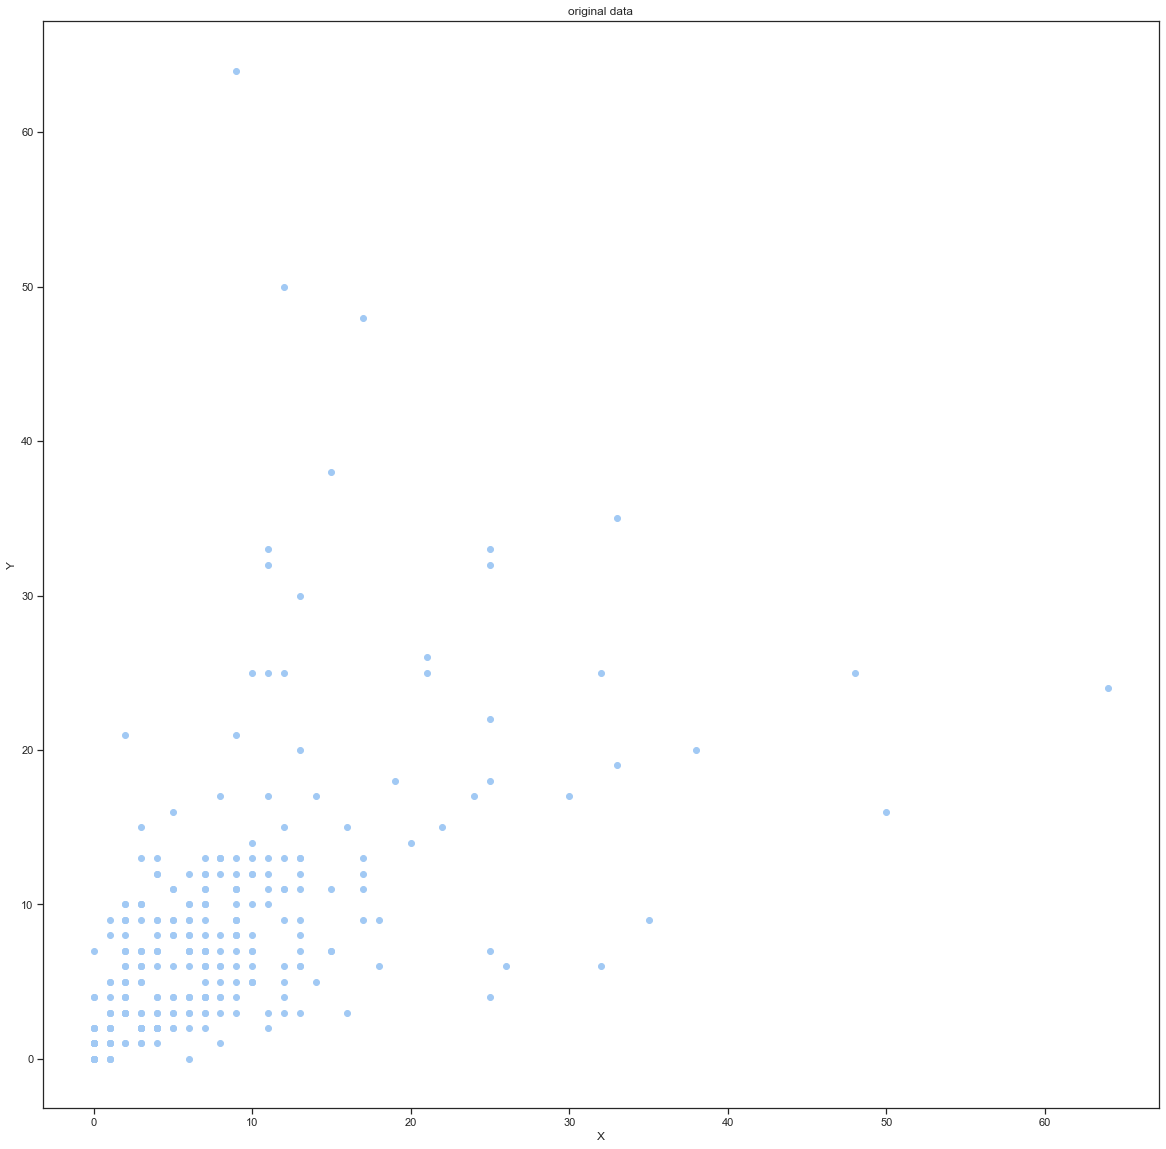

<ipython-input-614-6bf15de39cfe>:12: RuntimeWarning: divide by zero encountered in reciprocal
  self.features = [np.abs(self.X), np.sqrt(np.abs(self.X)), np.reciprocal(np.abs(self.X))]


Park test: P value = nan is smaller than 0.005, you may have heteroscedasticity
Test number 1 works the best with R2=0.7385920797085286 and p value=9.986695801279463e-85


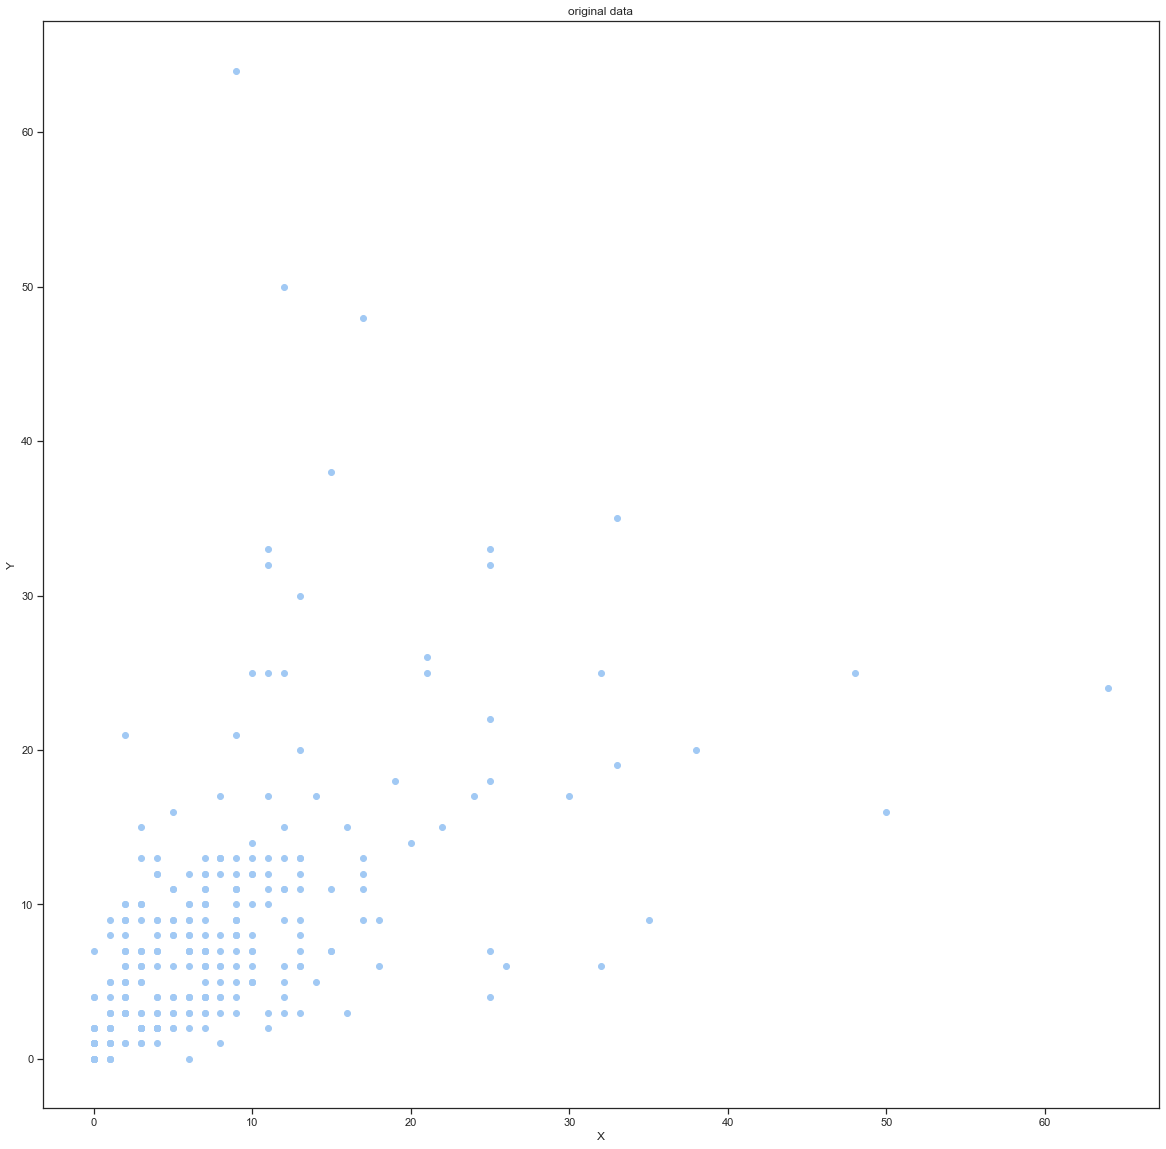

Glejser test: P value = 9.986695801279463e-85 is smaller than 0.00001, you have Heteroscedasticity


In [628]:

y = data['settled_cases'].values.reshape(-1,1)

X = data['settled_lag'].values.reshape(-1,1)
          
#          'volatility_index', 'growth_GDP', 'growth_unemp', 'lag_vol', 'growth_HPI', 'settled_lag', 'through', 'crisis']
         

#Park test

print(Park_test(X, Y).park_test())

#Glejser test      
print(Glejser_test(X, Y).glejser_test())  

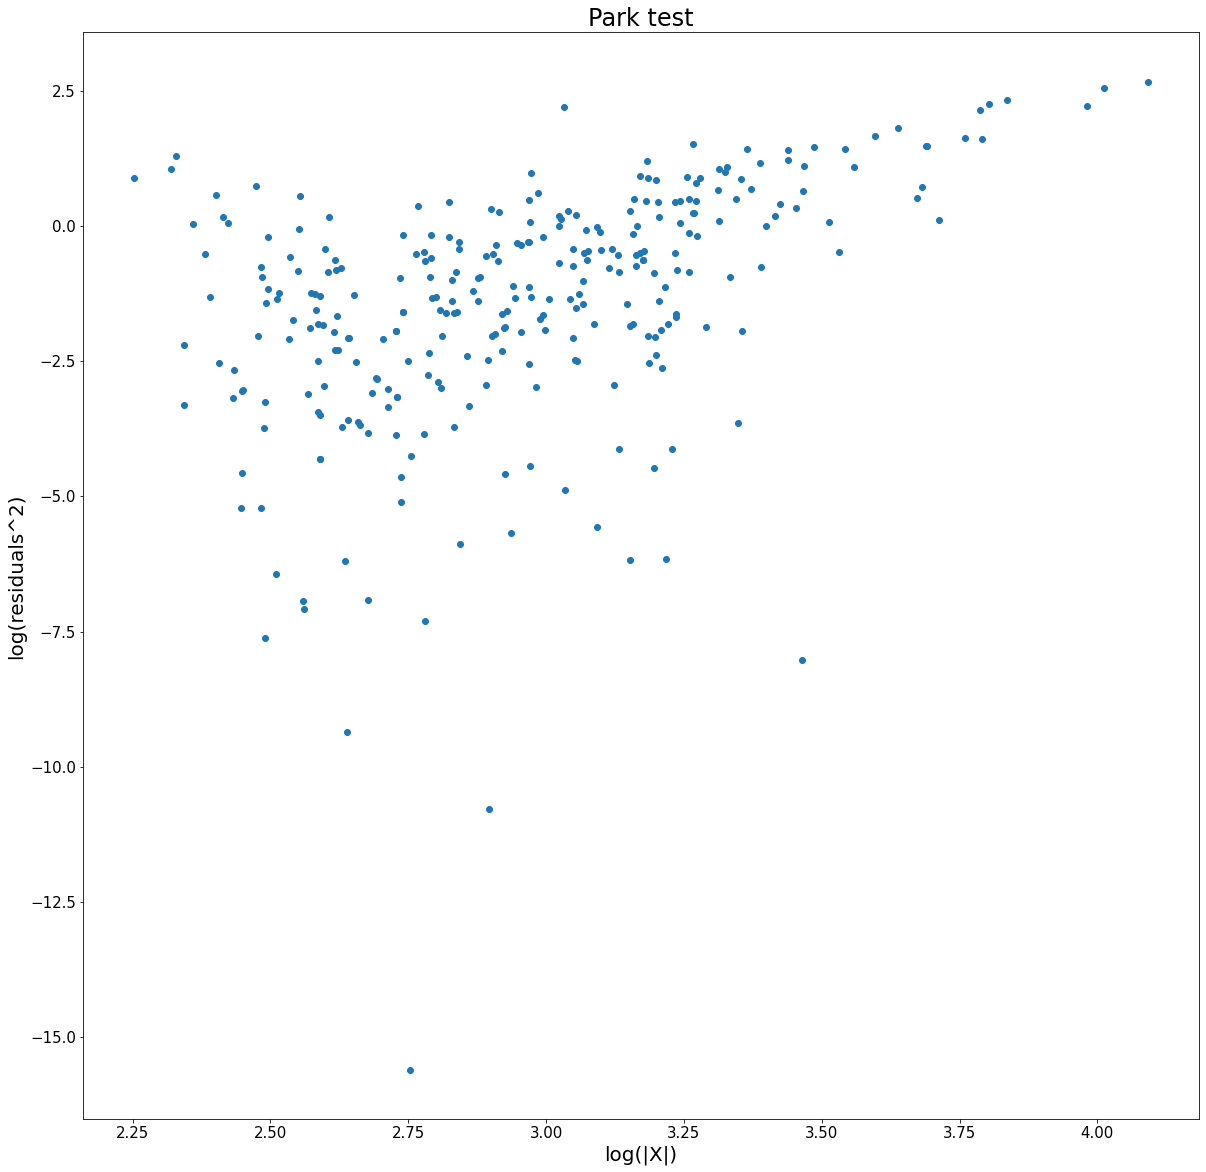

In [32]:
Park_test(X, Y).plot_log_residuals()

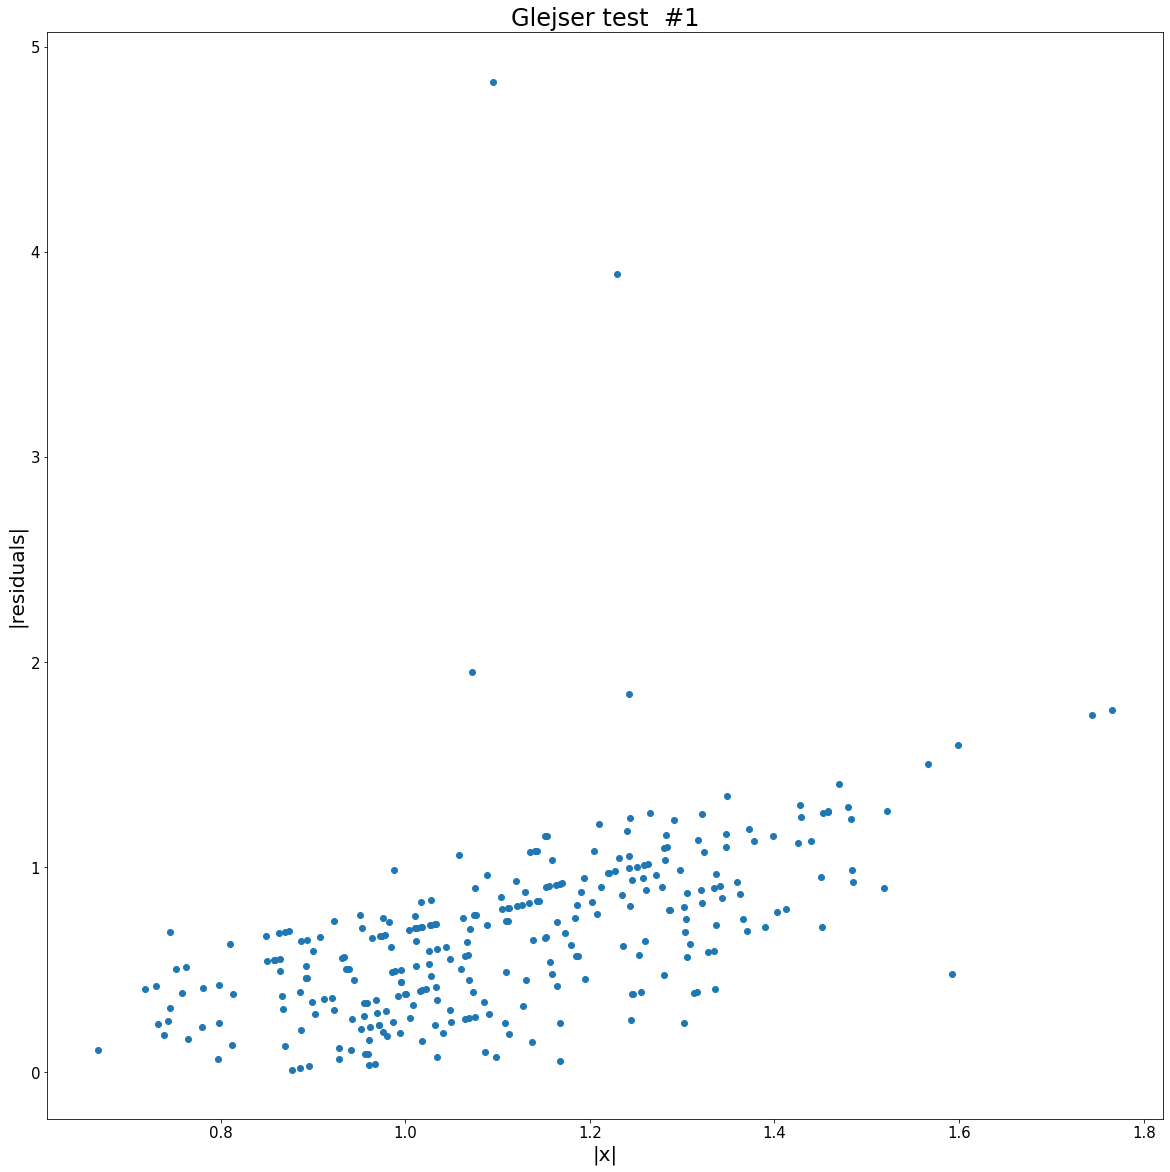

In [18]:
Glejser_test(X, Y2).plot_test(1)    

In [396]:
from statsmodels.tsa.stattools import grangercausalitytests

In [397]:
# Granger test for causality
maxlag = 12
test = 'ssr_chi2test' # One of 'lrtest', 'params_ftest', 'ssr_chi2test', 'ssr_ftest'
def granger_causation_matrix(data, variables, test='ssr_chi2test', zero_diagonal=False, verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.
    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for col in df.columns:
        for row in df.index:
            if col == row and zero_diagonal:
                df.loc[row, col] = 0
                continue
            test_result = grangercausalitytests(data[[row, col]], maxlag=maxlag, verbose=False)
            """if col == 'rgnp' and row == 'pgnp':
                print(data[[row, col]])
                pprint(test_result[1][0]['ssr_chi2test'])
                sys.exit(0)"""
            p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            if verbose:
                print(f'Y = {row}, X = {col}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[row, col] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [559]:
granger_df = granger_causation_matrix(data, variables=data.columns, zero_diagonal=True)
print(granger_df)

                    settled_cases_x  volatility_index_x  growth_GDP_x  \
settled_cases_y              0.0000              0.0807        0.0403   
volatility_index_y           0.0799              0.0000        0.0002   
growth_GDP_y                 0.0061              0.0000        0.0000   
growth_unemp_y               0.1590              0.0000        0.0000   
lag_vol_y                    0.5053              0.0866        0.0082   
growth_HPI_y                 0.0233              0.0000        0.0031   
settled_lag_y                0.0099              0.0333        0.6080   
through_y                    0.2812              0.0000        0.0000   
crisis_y                     0.0000              0.0006        0.0452   

                    growth_unemp_x  lag_vol_x  growth_HPI_x  settled_lag_x  \
settled_cases_y             0.1131     0.0231        0.0448         0.0000   
volatility_index_y          0.0155     0.0000        0.0241         0.2521   
growth_GDP_y                0.0000 

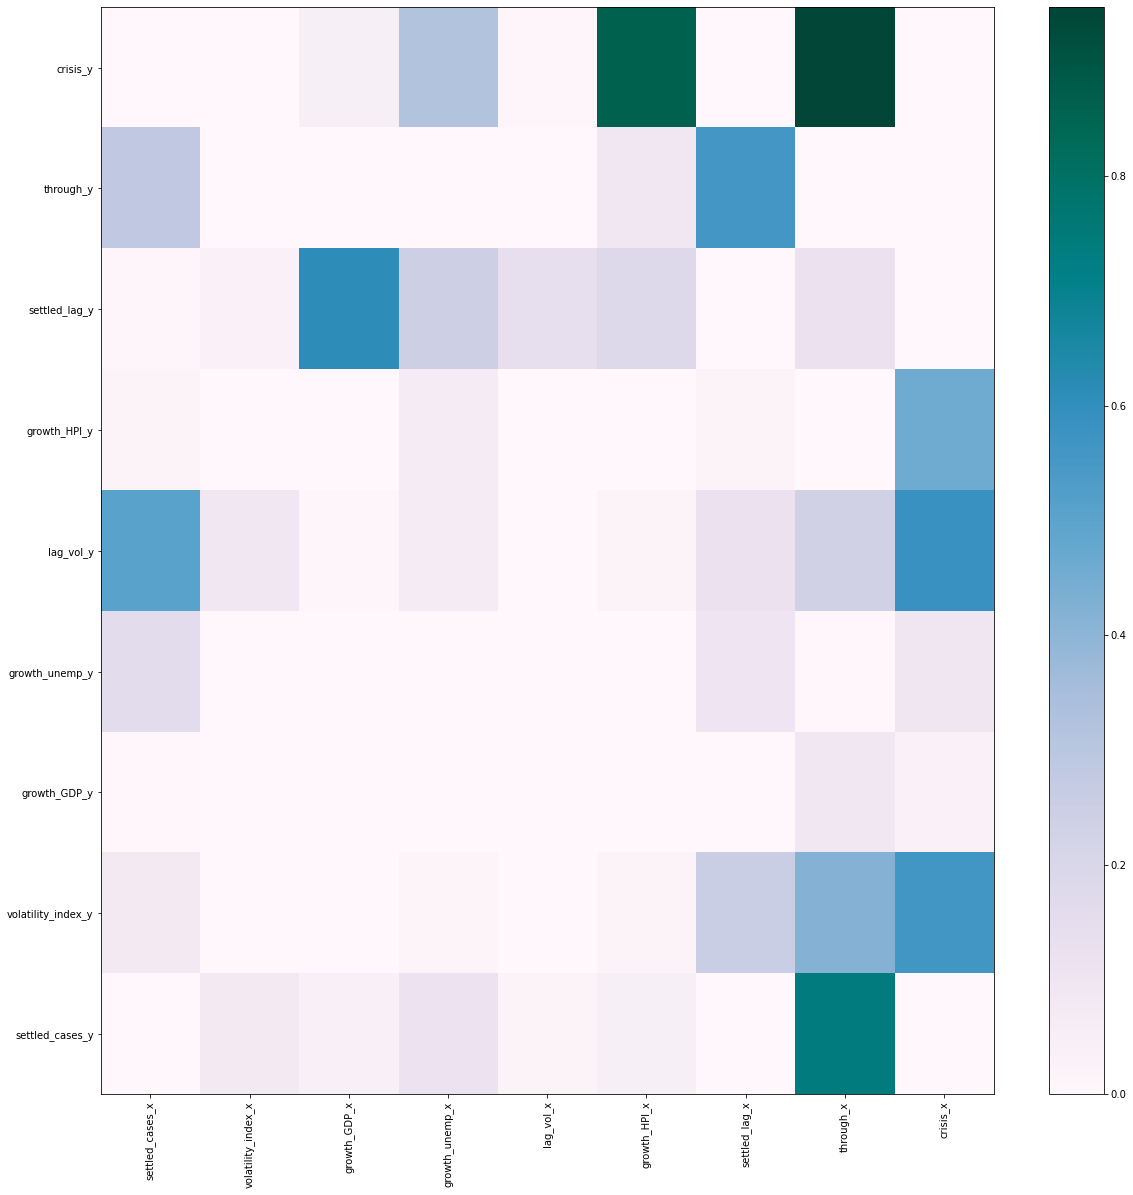

In [560]:
fig, ax = plt.figure(), plt.gca()
img = ax.imshow(granger_df, origin = 'lower',  cmap='PuBuGn')
ax.set_xticks(list(range(len(granger_df.columns))))
ax.set_xticklabels(granger_df.columns,rotation=90)
ax.set_yticks(list(range(len(granger_df.index))))
ax.set_yticklabels(granger_df.index,rotation=0)
ax.set_aspect("auto")
plt.colorbar(img)
plt.show()

In [561]:
granger_df_binary = pd.DataFrame().reindex_like(granger_df)
granger_df_binary[granger_df < 0.01] = 1
granger_df_binary.fillna(0, inplace=True)
print(granger_df_binary)

                    settled_cases_x  volatility_index_x  growth_GDP_x  \
settled_cases_y                 1.0                 0.0           0.0   
volatility_index_y              0.0                 1.0           1.0   
growth_GDP_y                    1.0                 1.0           1.0   
growth_unemp_y                  0.0                 1.0           1.0   
lag_vol_y                       0.0                 0.0           1.0   
growth_HPI_y                    0.0                 1.0           1.0   
settled_lag_y                   1.0                 0.0           0.0   
through_y                       0.0                 1.0           1.0   
crisis_y                        1.0                 1.0           0.0   

                    growth_unemp_x  lag_vol_x  growth_HPI_x  settled_lag_x  \
settled_cases_y                0.0        0.0           0.0            1.0   
volatility_index_y             0.0        1.0           0.0            0.0   
growth_GDP_y                   1.0 

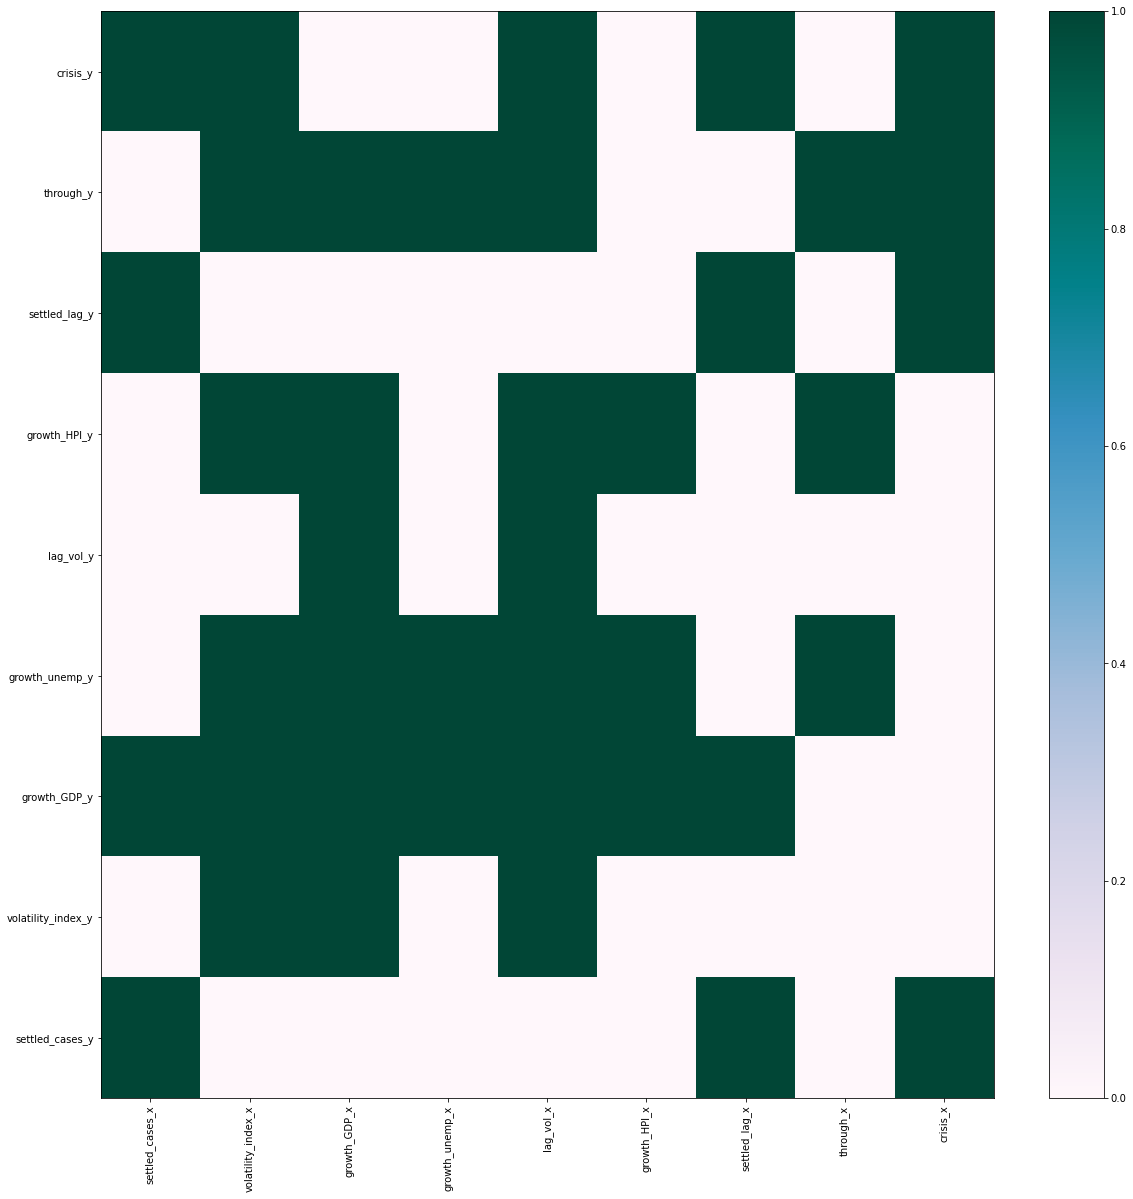

In [562]:
fig, ax = plt.figure(), plt.gca()
img = ax.imshow(granger_df_binary, origin = 'lower',  cmap='PuBuGn')
ax.set_xticks(list(range(len(granger_df.columns))))
ax.set_xticklabels(granger_df.columns,rotation=90)
ax.set_yticks(list(range(len(granger_df.index))))
ax.set_yticklabels(granger_df.index,rotation=0)
ax.set_aspect("auto")
plt.colorbar(img)
plt.show()

In [160]:
tsa.adfuller(dft["inflation"].diff().dropna(), regression='ct')

In [553]:
data.to_csv('mathias.csv')
data

,settled_cases,volatility_index,GDP2,growth_unemp,lag_vol,growth_HPI,settled_lag,through,crisis
Date,,,,,,,,,
1996-03-31,11,18.88,-0.635989,0.000000,17.01,0.003262,17.0,0.0,0
1996-04-30,7,15.83,-0.553163,0.018019,16.95,0.005605,15.0,0.0,0
1996-05-31,20,16.07,-0.474964,0.000000,18.11,0.005791,13.0,0.0,0
1996-06-30,4,13.68,-0.416742,-0.055060,17.14,0.005397,7.0,0.0,0
1996-07-31,5,19.46,-0.382092,0.037041,20.92,0.004445,12.0,0.0,0
...,...,...,...,...,...,...,...,...,...
2019-07-31,0,16.12,-0.055672,0.000000,13.78,0.003581,1.0,0.0,0
2019-08-31,0,18.98,-0.064838,0.027399,18.84,0.001706,0.0,0.0,0
2019-09-30,0,16.24,-0.069296,-0.055570,40.11,0.000864,0.0,0.0,0


In [548]:
import statsmodels.tsa.stattools as tsa
#Augmented Dickey–Fuller test
adf_results = {}
for col in data.columns.values:
    adf_results[col] = tsa.adfuller(data[col],regression='ct')

# loop over dictionary data
columns_big = []
columns_small = []
for key, value in adf_results.items():
    if value[1] > 0.05:
        columns_big.append(key)
    else:
        columns_small.append(key)

In [549]:
adf_results

{'settled_cases': (-3.7560154088379836,
  0.01892351024954988,
  9,
  275,
  {'1%': -3.9920727218031553,
   '5%': -3.426576756976709,
   '10%': -3.136505158767844},
  1597.5594952241834),
 'volatility_index': (-5.401346267994296,
  3.59916801176108e-05,
  0,
  284,
  {'1%': -3.991005429190148,
   '5%': -3.426063167124648,
   '10%': -3.1362038658353613},
  1548.8684642596636),
 'GDP2': (-3.5280479045475865,
  0.03648401678627096,
  11,
  273,
  {'1%': -3.9923195674201506,
   '5%': -3.426695522751254,
   '10%': -3.136574826282682},
  -2340.525081604702),
 'growth_unemp': (-3.3208675710425917,
  0.06289313405223051,
  12,
  272,
  {'1%': -3.9924443676593824,
   '5%': -3.42675556574633,
   '10%': -3.136610046488589},
  -1203.2855577239466),
 'lag_vol': (-4.516722651727287,
  0.0014171928338200697,
  2,
  282,
  {'1%': -3.9912366506582964,
   '5%': -3.4261744436988733,
   '10%': -3.1362691484545815},
  1585.41598464841),
 'growth_HPI': (-2.3589691885389823,
  0.4016470056108172,
  12,
  272

In [550]:
columns_big
#non stationary

['growth_unemp', 'growth_HPI', 'crisis']

In [551]:
columns_small
#stationary

['settled_cases',
 'volatility_index',
 'GDP2',
 'lag_vol',
 'settled_lag',
 'through']

In [61]:
#differentate non-stationary data
diff = dft[['HPI','lag_house','Eq2gdp','settled_cases']].diff(periods=1)
diff = diff.dropna()
#Augmented Dickey–Fuller test
adf_results = {}
for col in diff.columns.values:
    adf_results[col] = tsa.adfuller(diff[col])

# loop over dictionary data
columns_big = []
columns_small = []
for key, value in adf_results.items():
    if value[1] > 0.05:
        columns_big.append(key)
    else:
        columns_small.append(key)
columns_small
#stationary        

['Eq2gdp', 'settled_cases']

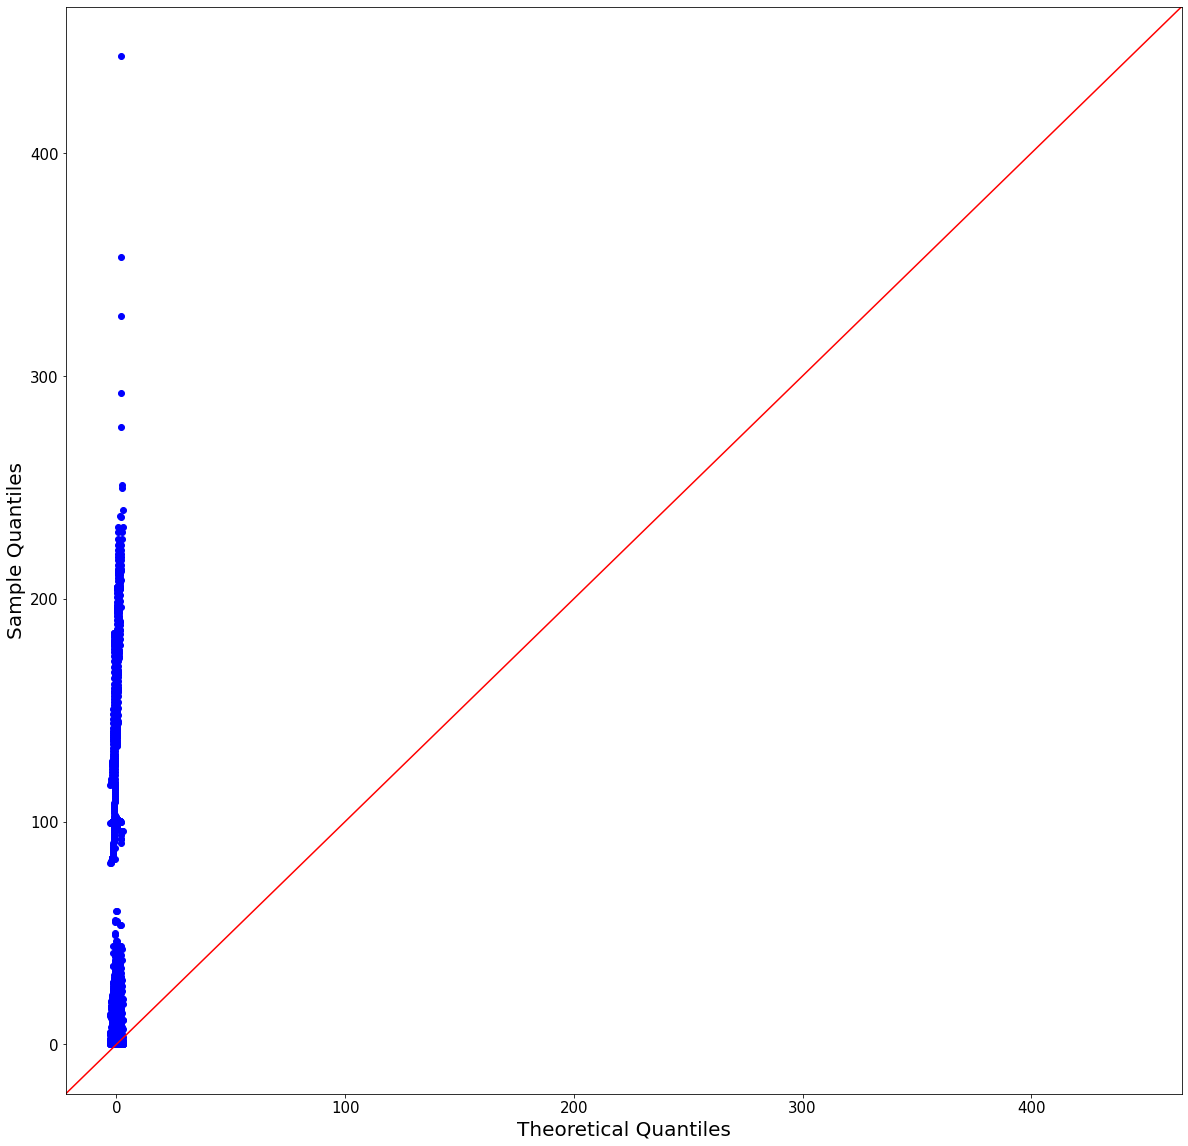

In [30]:
sm.qqplot(dft, line ='45') 
plt.show() 

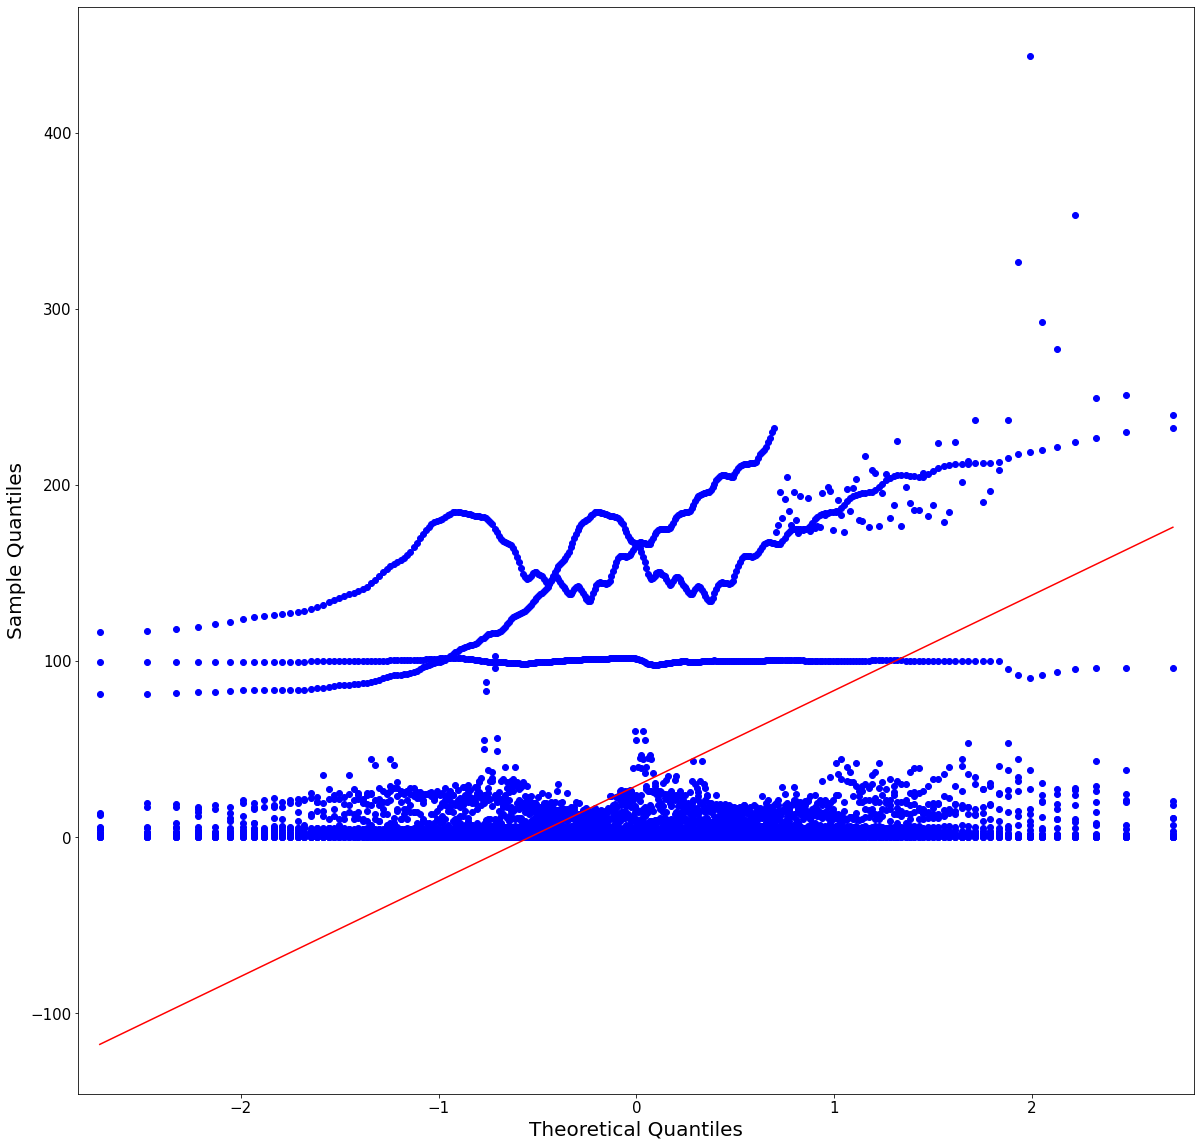

In [31]:
sm.qqplot(dft, line ='s') 
plt.show() 

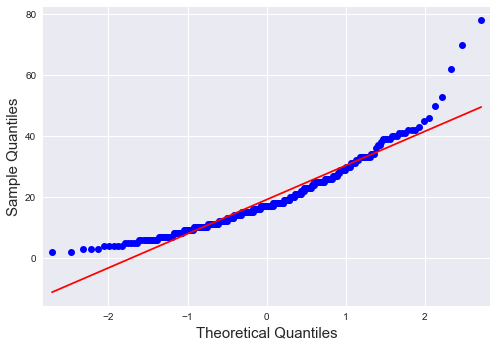

In [15]:
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
sm.qqplot(dft['all_cases'], line ='s') 
plt.show() 

In [232]:
X = dft2[['volatility_index','growth_GDP','growth_unemp','lag_vol','inf_diff']]
y = dft2['growth_settled']
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit(cov_type='HAC',cov_kwds={'maxlags':6})

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals

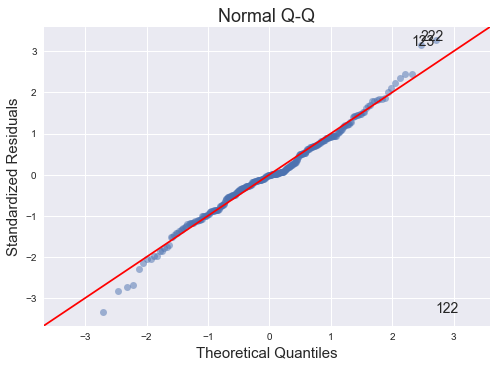

In [233]:
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

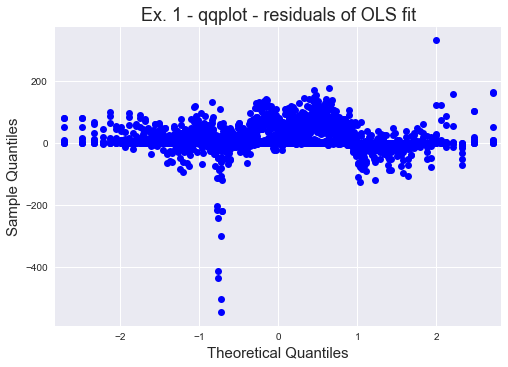

In [35]:
model = sm.OLS(X, y)
mod_fit = model.fit()
res = mod_fit.resid # residuals
pplot = sm.ProbPlot(res)
fig = pplot.qqplot()
h = plt.title("Ex. 1 - qqplot - residuals of OLS fit")
plt.show()

In [234]:
dft2.isnull().sum()

growth_all          0
growth_settled      0
volatility_index    0
growth_GDP          0
growth_unemp        0
lag_vol             0
inf_diff            0
vol_diff            0
dtype: int64

In [50]:
from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(dft['inflation'])
print(pp)

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.621
P-value                         0.089
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [179]:
#PP test
pp_results = {}
for col in dft2.columns.values:
    pp_results[col] = PhillipsPerron(dft2[col],test_type='tau',lags = 18)

In [180]:
pp_results

{'growth_all': <class 'arch.unitroot.unitroot.PhillipsPerron'>
 """
      Phillips-Perron Test (Z-tau)    
 Test Statistic                -42.655
 P-value                         0.000
 Lags                               18
 -------------------------------------
 
 Trend: Constant
 Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
 Null Hypothesis: The process contains a unit root.
 Alternative Hypothesis: The process is weakly stationary.
 """,
 'growth_settled': <class 'arch.unitroot.unitroot.PhillipsPerron'>
 """
      Phillips-Perron Test (Z-tau)    
 Test Statistic                -56.131
 P-value                         0.000
 Lags                               18
 -------------------------------------
 
 Trend: Constant
 Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
 Null Hypothesis: The process contains a unit root.
 Alternative Hypothesis: The process is weakly stationary.
 """,
 'volatility_index': <class 'arch.unitroot.unitroot.PhillipsPerron'>
 """
      Phillips-P

In [40]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pyearth import Earth
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from datetime import datetime
import math

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=.3, random_state=1)

In [124]:
from math import ceil

def train_test_split_sorted(X, y, test_size, dates):
    """Splits X and y into train and test sets, with test set separated by most recent dates.

    Example:
    --------
    >>> from sklearn import datasets

    # Fake dataset:
    >>> gen_data = datasets.make_classification(n_samples=10000, n_features=5)
    >>> dates = np.array(pd.date_range('2016-01-01', periods=10000, freq='5min'))
    >>> np.random.shuffle(dates)
    >>> df = pd.DataFrame(gen_data[0])
    >>> df['date'] = dates
    >>> df['target'] = gen_data[1]

    # Separate:
    >>> X_train, X_test, y_train, y_test = train_test_split_sorted(df.drop('target', axis=1), df['target'], 0.33, df['date'])

    >>> print('Length train set: {}'.format(len(y_train)))
    Length train set: 8000
    >>> print('Length test set: {}'.format(len(y_test)))
    Length test set: 2000
    >>> print('Last date in train set: {}'.format(X_train['date'].max()))
    Last date in train set: 2016-01-28 18:35:00
    >>> print('First date in test set: {}'.format(X_test['date'].min()))
    First date in test set: 2016-01-28 18:40:00
    """

    n_test = ceil(test_size * len(X))

    sorted_index = [x for _, x in sorted(zip(np.array(dates), np.arange(0, len(dates))), key=lambda pair: pair[0])]
    train_idx = sorted_index[:-n_test]
    test_idx = sorted_index[-n_test:]

    if isinstance(X, (pd.Series, pd.DataFrame)):
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
    else:
        X_train = X[train_idx]
        X_test = X[test_idx]
    if isinstance(y, (pd.Series, pd.DataFrame)):
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]
    else:
        y_train = y[train_idx]
        y_test = y[test_idx]

    return X_train, X_test, y_train, y_test

In [127]:
#model = Pipeline([('earth',Earth()),('log',SGDClassifier())])

X_train, X_test, y_train, y_test = train_test_split_sorted(X, y, 0.333, dft.index)

In [135]:
X = dft[['volatility_index', 'peak','expansion','HPI','GDP','unemp','lag_vol','lag_house','Eq2gdp','inflation']]
y = dft['all_cases']
y2 = dft['settled_cases']

In [139]:
tss = TimeSeriesSplit(n_splits = 3)
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [140]:
dt=datetime.now()
earth_net_0 = Pipeline([('earth',Earth(max_degree=4,enable_pruning=False)),('enet',ElasticNet(l1_ratio=0.0,alpha=1.0))])
earth_net_0.fit(X_train,y_train)
print ("net= ",datetime.now()-dt)

dt=datetime.now()
earth_net_1 = Pipeline([('earth',Earth(max_degree=4,enable_pruning=False)),('enet',ElasticNet(l1_ratio=1.0,alpha=1.0))])

earth_net_1.fit(X_train,y_train)
print ("net= ",datetime.now()-dt)

dt=datetime.now()
earth_net= Pipeline([('earth',Earth(max_degree=4,enable_pruning=False)),('enet',ElasticNet())])
earth_net.fit(X_train,y_train)
print ("net= ",datetime.now()-dt)

dt=datetime.now()
earth_lasso = Pipeline([('earth',Earth(max_degree=4,enable_pruning=False)),('lasso',Lasso())])
earth_lasso.fit(X_train,y_train)
print ("lasso= ",datetime.now()-dt)

dt=datetime.now()
earth_ridge = Pipeline([('earth',Earth(max_degree=4,enable_pruning=False)),('ridge',Ridge())])
earth_ridge.fit(X_train,y_train)
print("ridge= ",datetime.now()-dt)
dt=datetime.now()
earth_model = Earth(max_degree=4)
earth_model.fit(X_train,y_train)
print ("earth= ",datetime.now()-dt)

dt=datetime.now()
earth_overfit =Earth(max_degree=4,enable_pruning=False)
earth_overfit.fit(X_train,y_train)
print ("overfit earth= ",datetime.now()-dt)

Y_test_predict_earth_net=earth_net.predict(X_test)
Y_test_predict_earth_net_0=earth_net_0.predict(X_test)
Y_test_predict_earth_net_1=earth_net_1.predict(X_test)
Y_test_predict_earth_lasso=earth_lasso.predict(X_test)
Y_test_predict_earth_ridge=earth_ridge.predict(X_test)
Y_test_predict_earth=earth_model.predict(X_test)
Y_test_predict_earth_overfit=earth_overfit.predict(X_test)

print("~~~~~~~~~~~~~~~")

print('Earth Overfit score %f' % r2_score(y_test, Y_test_predict_earth_overfit))
print('Earth Score: %f' % r2_score(y_test, Y_test_predict_earth))
print('Earth Ridge score %f'% r2_score(y_test, Y_test_predict_earth_ridge))
print('Earth Lasso Score: %f' % r2_score(y_test, Y_test_predict_earth_lasso))
print('Earth Net Score: %f' % r2_score(y_test, Y_test_predict_earth_net))

/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4725.978672460212, tolerance: 2.410939555555556
  model = cd_fast.enet_coordinate_descent(
/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warn

net=  0:00:00.158555
net=  0:00:00.145009


/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4729.272741717553, tolerance: 2.410939555555556
  model = cd_fast.enet_coordinate_descent(
/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warn

net=  0:00:00.154039
lasso=  0:00:00.145269


/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


ridge=  0:00:00.151130
earth=  0:00:00.383940
overfit earth=  0:00:00.142822
~~~~~~~~~~~~~~~
Earth Overfit score -26.712834
Earth Score: -5.372815
Earth Ridge score -27.757088
Earth Lasso Score: -27.409217
Earth Net Score: -27.998785


/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


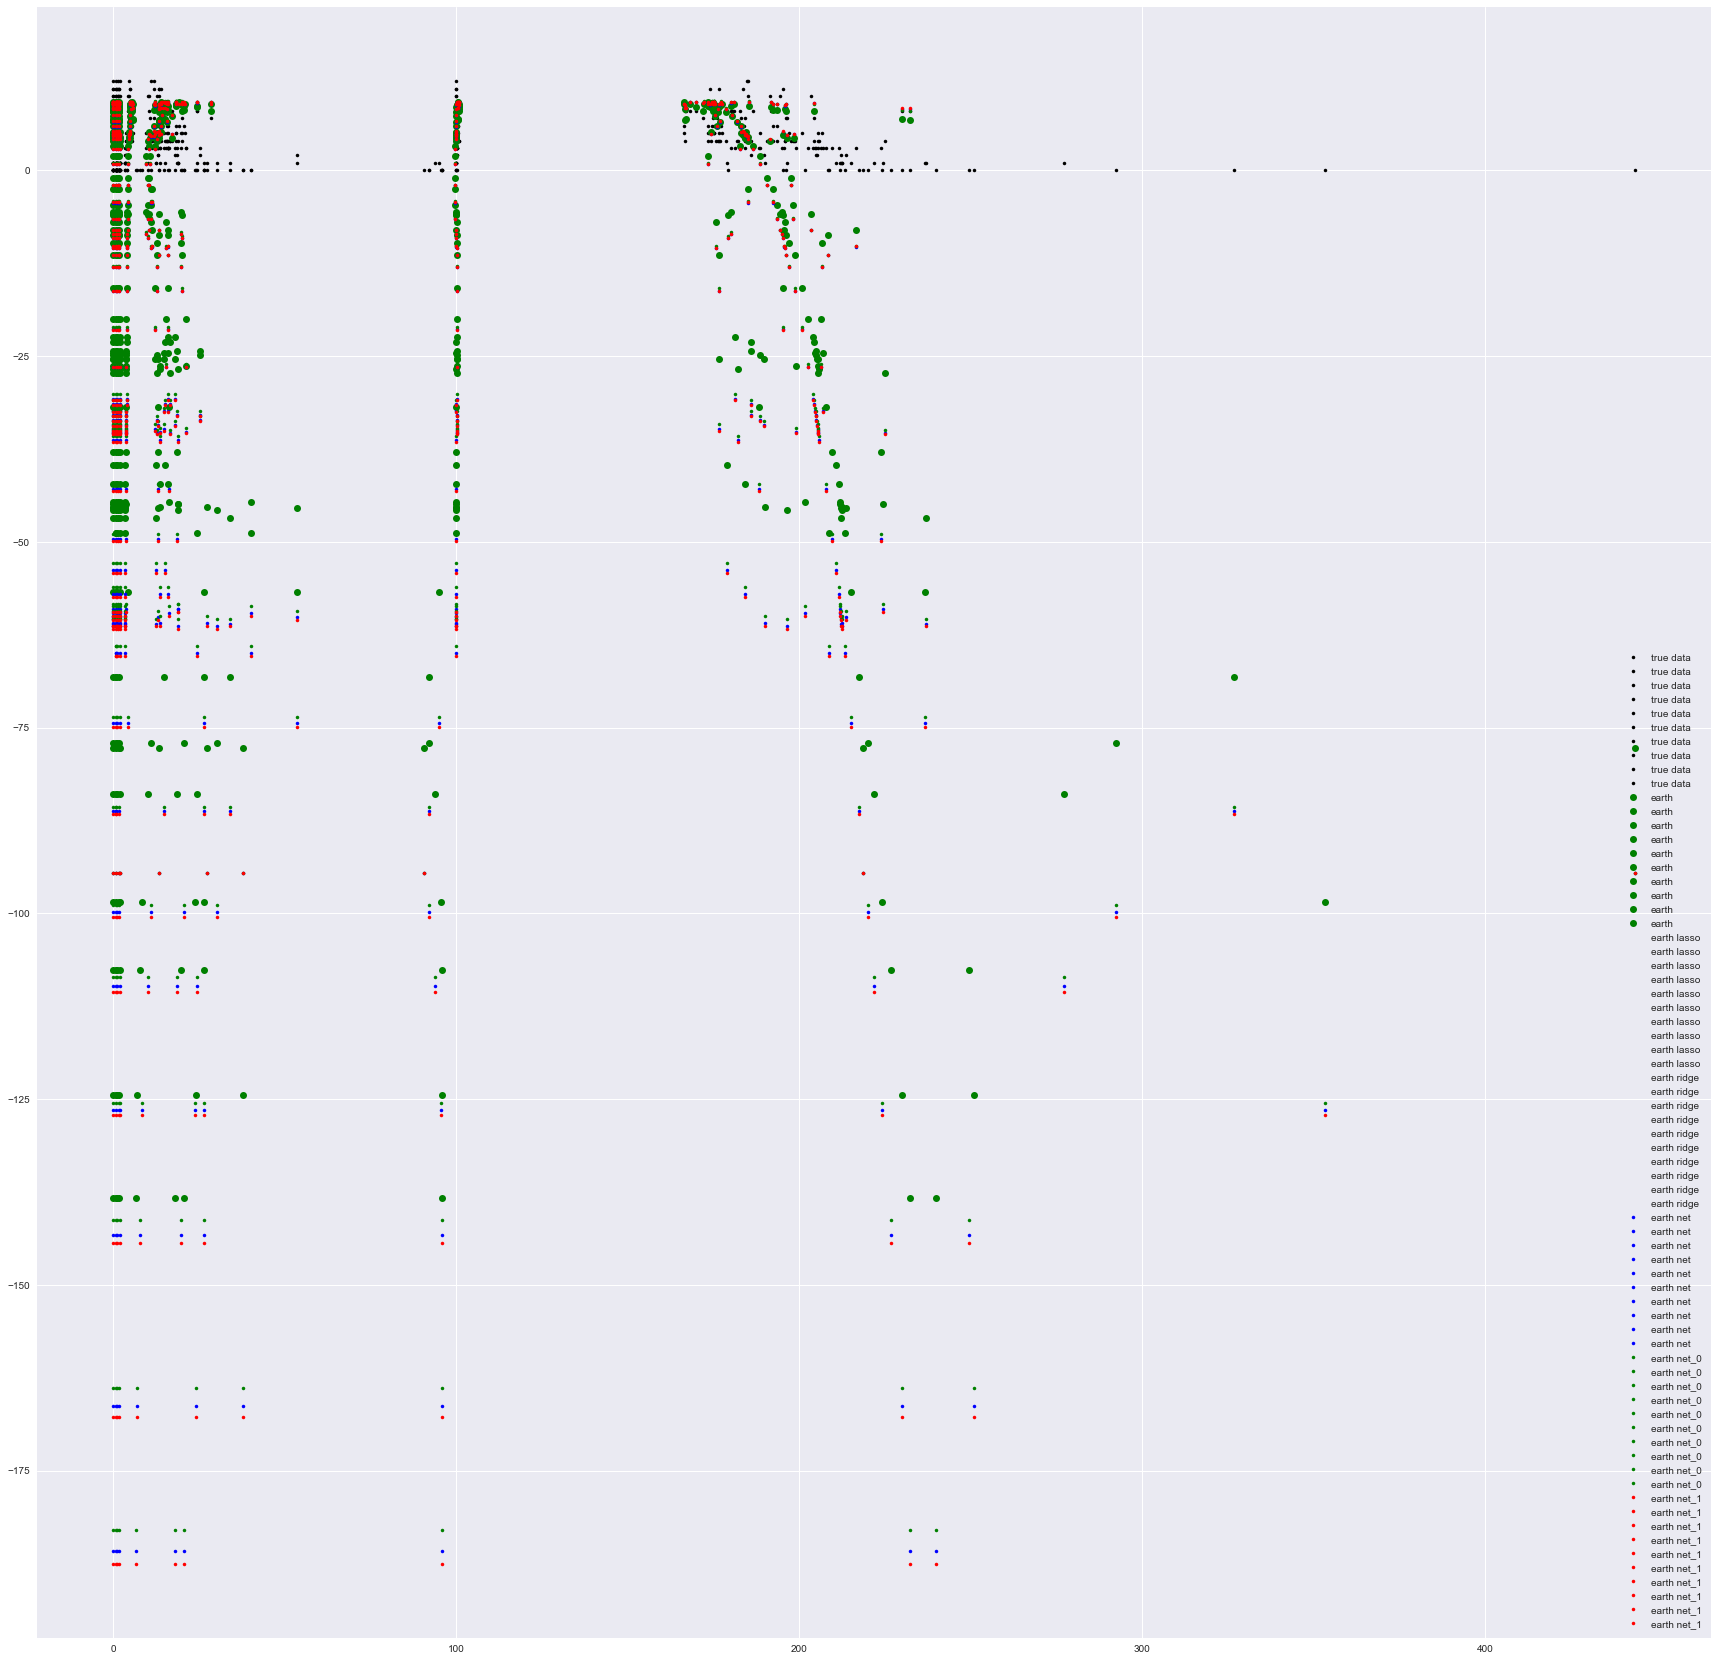

In [138]:

plt.figure(figsize =(30,30))

plt.plot(X_test,y_test,"k.",label="true data")
#plt.plot(X_test['x0'],Y_test_predict_earth_overfit,"ro",label="earth overfit")
plt.plot(X_test,Y_test_predict_earth,"go",label="earth")

plt.plot(X_test,Y_test_predict_earth_lasso,"cx",label="earth lasso")
plt.plot(X_test,Y_test_predict_earth_ridge,"mx",label="earth ridge")
plt.plot(X_test,Y_test_predict_earth_net,"b.",label="earth net")
plt.plot(X_test,Y_test_predict_earth_net_0,"g.",label="earth net_0")
plt.plot(X_test,Y_test_predict_earth_net_1,"r.",label="earth net_1")

plt.legend()

plt.show()

In [68]:
features_linear = dft.columns

## read features
features_linear

Index(['volatility_index', 'peak', 'through', 'contraction', 'expansion',
       'HPI', 'GDP', 'unemp', 'lag_vol', 'lag_house', 'Eq2gdp', 'all_cases',
       'settled_cases', 'ongoing_cases', 'dismissed_cases', 'inflation',
       'all_cases_sq', 'settled_cases_sq'],
      dtype='object')

In [81]:
features_linear = dft[['volatility_index', 'peak', 'through', 'contraction', 'expansion',
       'HPI', 'GDP', 'unemp', 'lag_vol', 'lag_house', 'Eq2gdp', 'inflation']]
features = []

## loop through adding each variable in order to the model
for i in features_linear:
    features.append(i)
    X_linear = dft[features]
    y_linear = dft['all_cases']

In [88]:
features_gam = features_linear
features_two = []

for i in features_gam:
    features_two.append(i)
    X_linear_gam = X.to_numpy()
    y_linear_gam = y.to_numpy()

    X_train_linear_gam, X_test_linear_gam, y_train_linear_gam, y_test_linear_gam = train_test_split(X_linear_gam, y_linear_gam, test_size=0.20, random_state=42)

    lams = np.random.rand(299,10)
    lams = lams* 12- 4
    lams = np.exp(lams)
    gam = LinearGAM(n_splines = 25, spline_order=4, callbacks=['diffs']).gridsearch(X_train_linear_gam, y_train_linear_gam,lam=lams)

    print(len(features))
    print(gam.statistics_['pseudo_r2'])
    print(gam.statistics_['GCV'])

100% (299 of 299) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
N/A% (0 of 299) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

12
OrderedDict([('explained_deviance', 0.5442478271145406), ('McFadden', 0.9985445623530469), ('McFadden_adj', -0.019864178796449083)])
87.59613330846223


100% (299 of 299) |######################| Elapsed Time: 0:00:42 Time:  0:00:42
  0% (1 of 299) |                        | Elapsed Time: 0:00:00 ETA:   0:00:40

12
OrderedDict([('explained_deviance', 0.5314104265334862), ('McFadden', 0.9986228714790614), ('McFadden_adj', -0.01757688198336771)])
86.58601276394495


100% (299 of 299) |######################| Elapsed Time: 0:00:41 Time:  0:00:41
  0% (1 of 299) |                        | Elapsed Time: 0:00:00 ETA:   0:00:39

12
OrderedDict([('explained_deviance', 0.5836194124616108), ('McFadden', 0.99822967865425), ('McFadden_adj', -0.025369277154367653)])
88.2070471379101


100% (299 of 299) |######################| Elapsed Time: 0:00:41 Time:  0:00:41
  0% (1 of 299) |                        | Elapsed Time: 0:00:00 ETA:   0:00:42

12
OrderedDict([('explained_deviance', 0.5408471645579277), ('McFadden', 0.9985584416012143), ('McFadden_adj', -0.01885421812078958)])
86.72609302822445


100% (299 of 299) |######################| Elapsed Time: 0:00:41 Time:  0:00:41
  0% (1 of 299) |                        | Elapsed Time: 0:00:00 ETA:   0:00:40

12
OrderedDict([('explained_deviance', 0.5239119743348768), ('McFadden', 0.9986889694262264), ('McFadden_adj', -0.017606773590640667)])
88.00194453792535


100% (299 of 299) |######################| Elapsed Time: 0:00:42 Time:  0:00:42
  0% (1 of 299) |                        | Elapsed Time: 0:00:00 ETA:   0:00:40

12
OrderedDict([('explained_deviance', 0.562834342923223), ('McFadden', 0.9984180807367258), ('McFadden_adj', -0.023052765564534727)])
88.85708154997108


100% (299 of 299) |######################| Elapsed Time: 0:00:44 Time:  0:00:44
  0% (1 of 299) |                        | Elapsed Time: 0:00:00 ETA:   0:00:40

12
OrderedDict([('explained_deviance', 0.5623972054094437), ('McFadden', 0.9983774802082751), ('McFadden_adj', -0.020862227640271014)])
85.60008125941832


100% (299 of 299) |######################| Elapsed Time: 0:00:43 Time:  0:00:43
  0% (1 of 299) |                        | Elapsed Time: 0:00:00 ETA:   0:00:39

12
OrderedDict([('explained_deviance', 0.5376434884368679), ('McFadden', 0.9985718484576764), ('McFadden_adj', -0.01792859490831389)])
85.95882258370116


100% (299 of 299) |######################| Elapsed Time: 0:00:43 Time:  0:00:43
  0% (1 of 299) |                        | Elapsed Time: 0:00:00 ETA:   0:00:39

12
OrderedDict([('explained_deviance', 0.5783808183566842), ('McFadden', 0.9982785597830279), ('McFadden_adj', -0.02473105411605614)])
88.29958324092127


100% (299 of 299) |######################| Elapsed Time: 0:00:44 Time:  0:00:44
  0% (1 of 299) |                        | Elapsed Time: 0:00:00 ETA:   0:00:39

12
OrderedDict([('explained_deviance', 0.5481483354173247), ('McFadden', 0.9984971628471866), ('McFadden_adj', -0.019382176216027114)])
86.13585486990128


100% (299 of 299) |######################| Elapsed Time: 0:00:44 Time:  0:00:44
  0% (1 of 299) |                        | Elapsed Time: 0:00:00 ETA:   0:00:40

12
OrderedDict([('explained_deviance', 0.5456947650718689), ('McFadden', 0.998532566914448), ('McFadden_adj', -0.01997235931310959)])
87.48325180839066


100% (299 of 299) |######################| Elapsed Time: 0:00:42 Time:  0:00:42


12
OrderedDict([('explained_deviance', 0.5905915747155727), ('McFadden', 0.9981647366529873), ('McFadden_adj', -0.026342196472617596)])
88.26548596293807


In [116]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.patches import Patch
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

In [62]:
cvs = [TimeSeriesSplit]
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 3

for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(20, 20))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()

NameError: name 'TimeSeriesSplit' is not defined

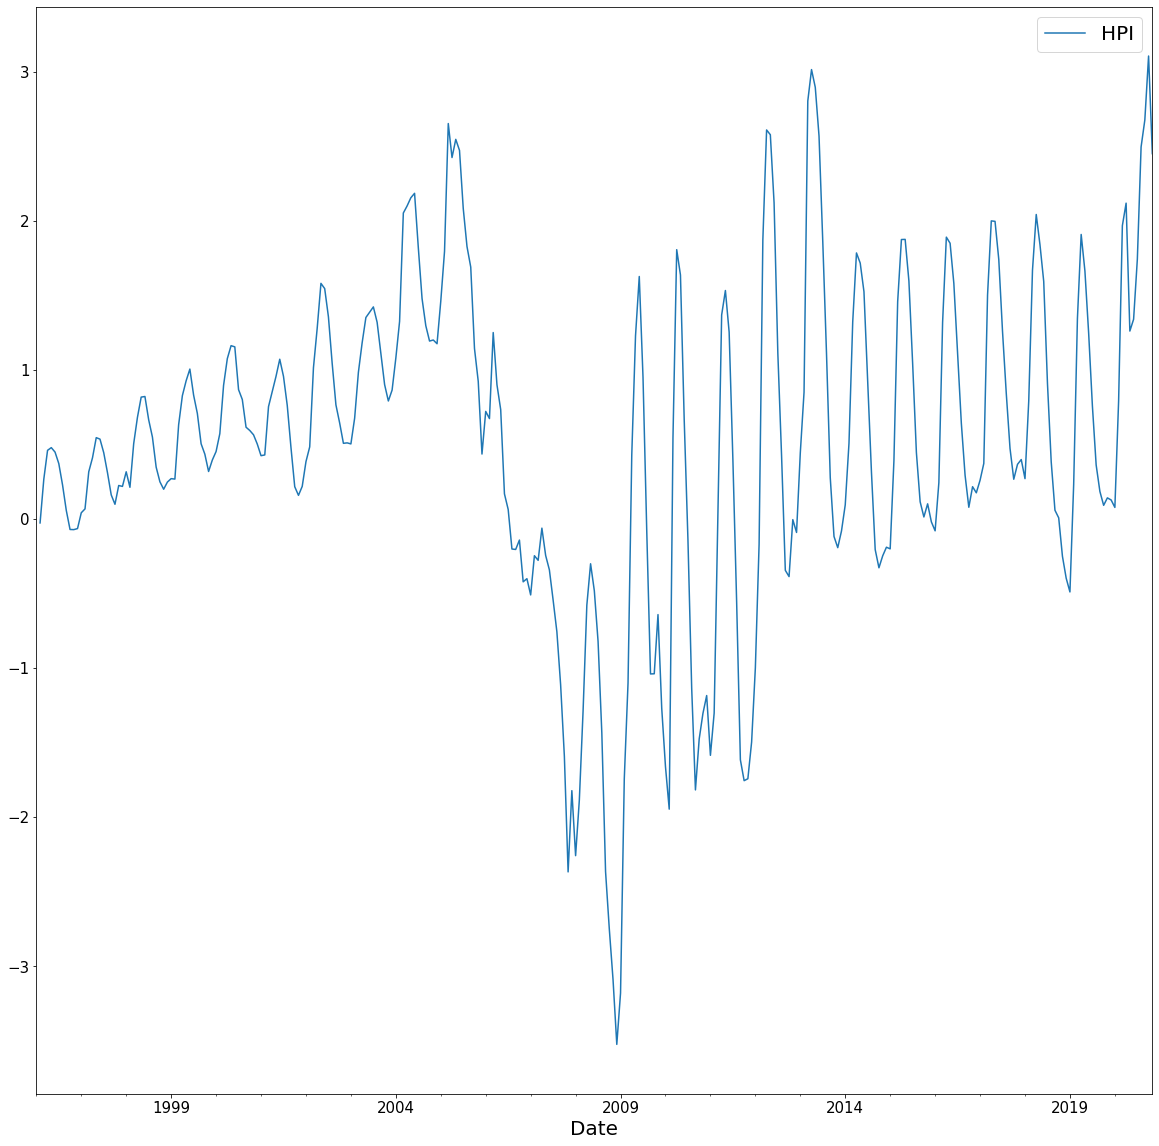

In [67]:
dft[['HPI']].diff().plot()

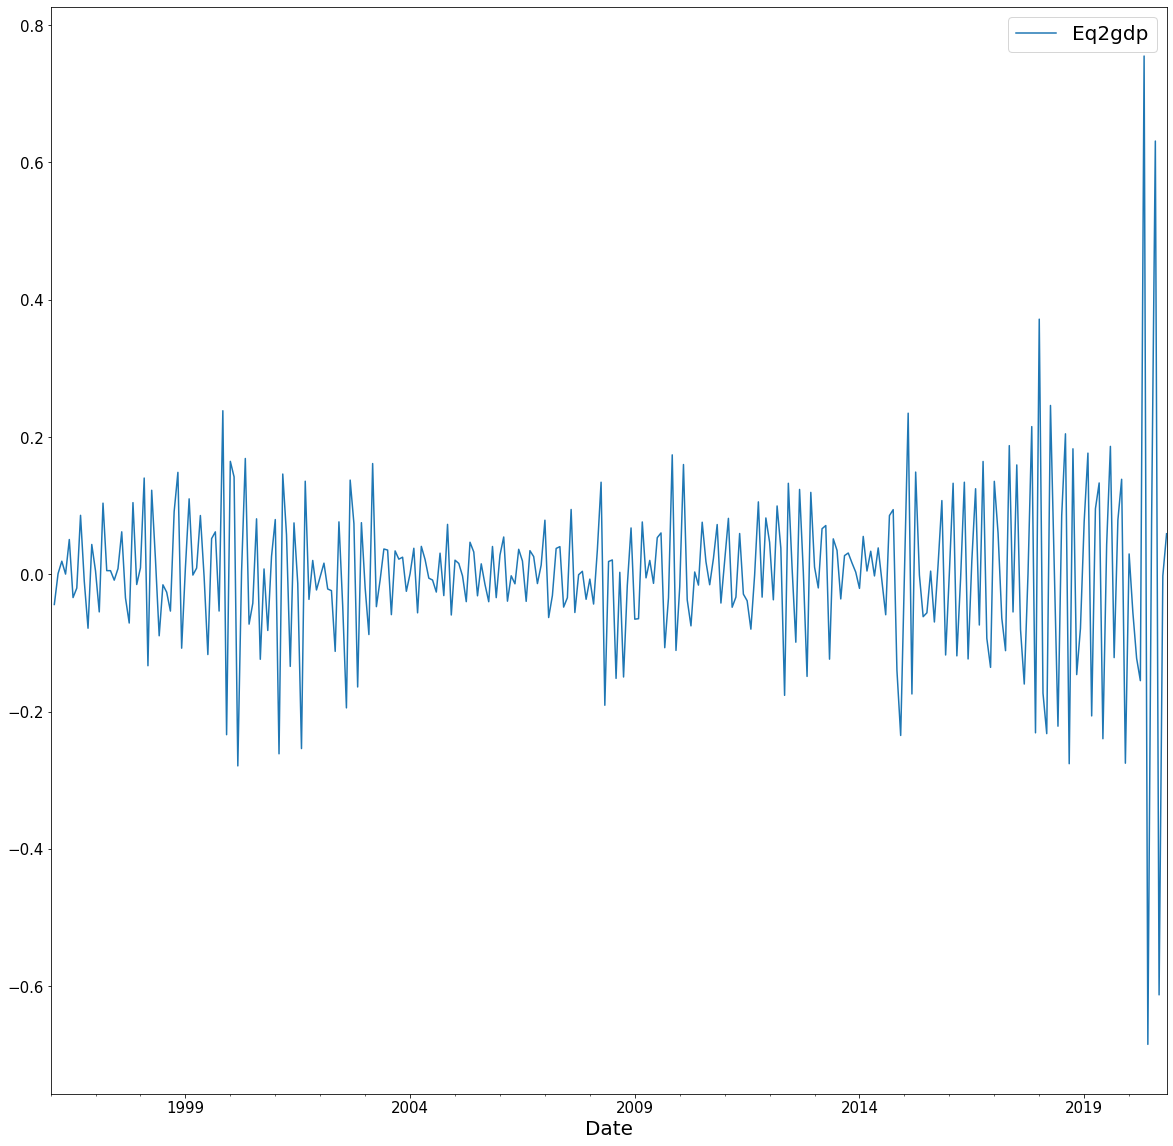

In [70]:
dft[['Eq2gdp']].diff().plot()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

In [214]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [235]:
f ='growth_settled~volatility_index+growth_GDP+growth_unemp+lag_vol+inflation'
model = ols(formula=f, data=dft).fit()

In [236]:
white_test = het_white(model.resid,model.model.exog)

In [237]:
bp_test = het_breuschpagan(model.resid,model.model.exog)

In [238]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))
#Heteroskedasticity is indicated if p <0.05, so according to these tests, this model is heteroskedastic.
#caveat is that these tests can return low p-values when the model is not heteroskedastic if the model is otherwise flawed (most commonly due to omitted variable bias

{'LM Statistic': 1.4759771248571998, 'LM-Test p-value': 0.9158252877650898, 'F-Statistic': 0.29069167231673343, 'F-Test p-value': 0.9179460829081058}
{'LM Statistic': 26.45611186466726, 'LM-Test p-value': 0.15127079666684795, 'F-Statistic': 1.3493846311246218, 'F-Test p-value': 0.14757489158426101}


/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


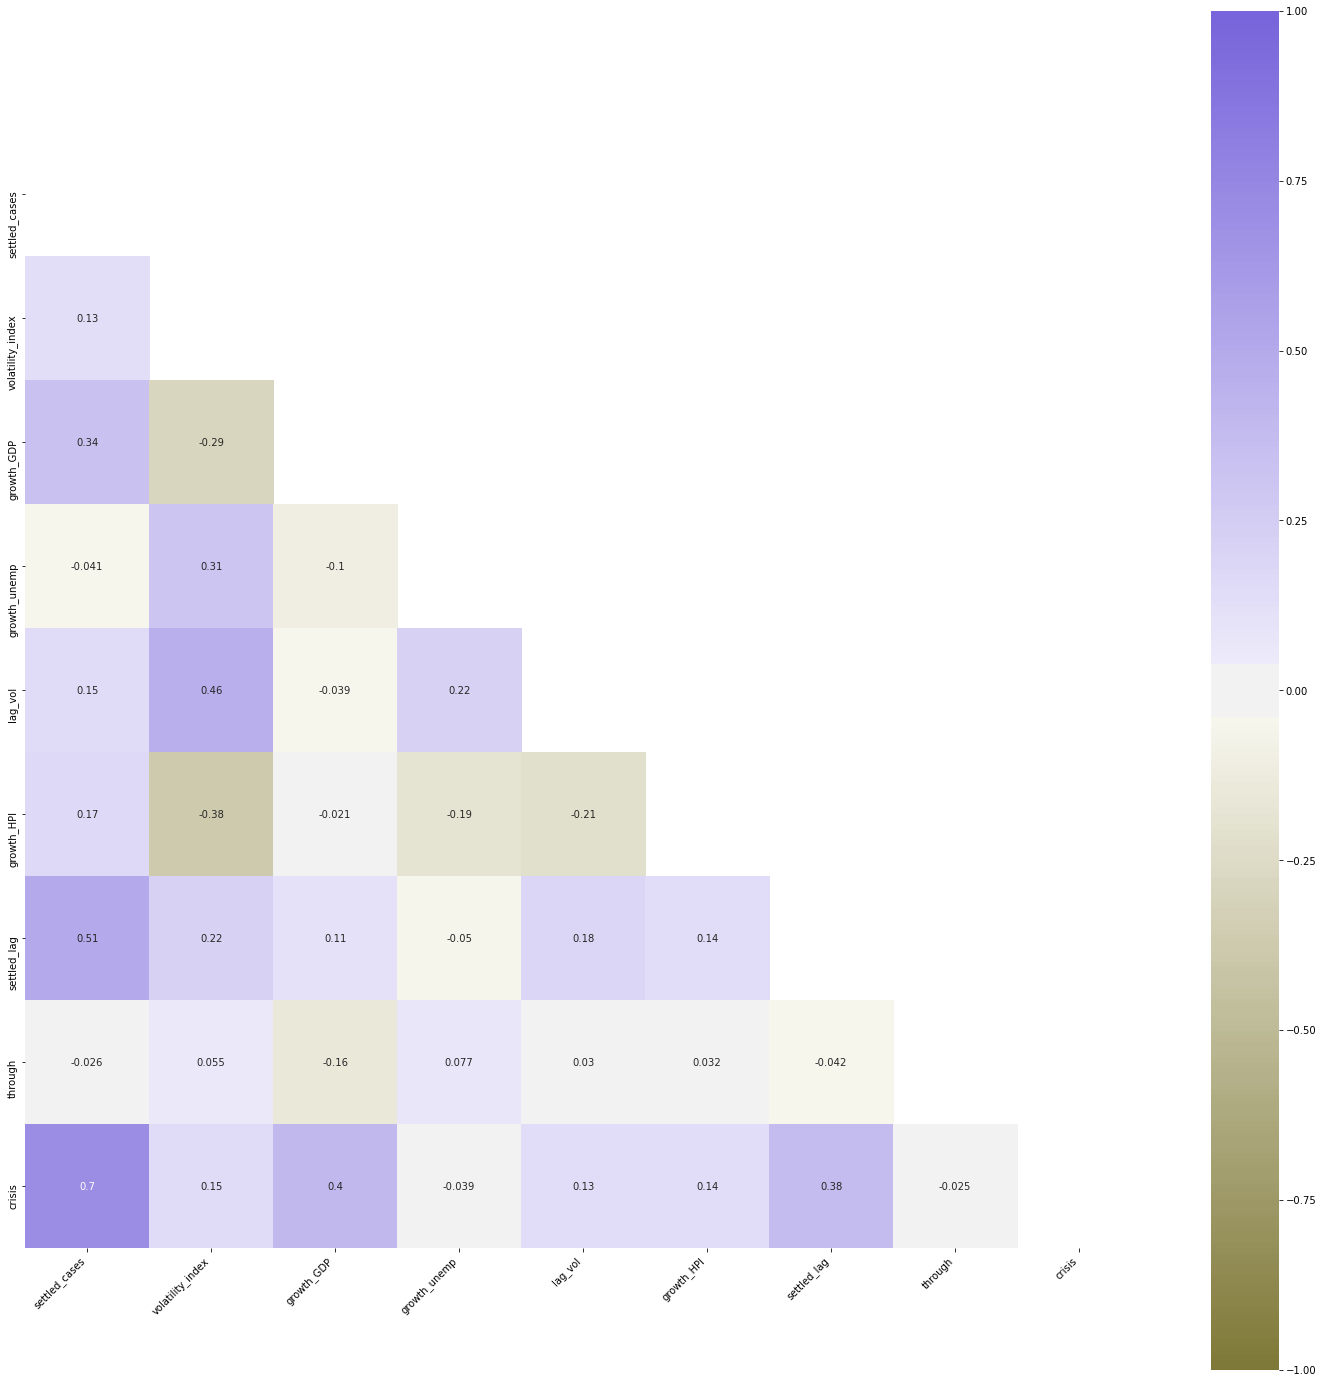

In [554]:
data.rename(columns = {'GDP2': 'growth_GDP'}, inplace = True)
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(25,25))
ax = sns.heatmap(
    corr, 
    mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(80, 990, n=299),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

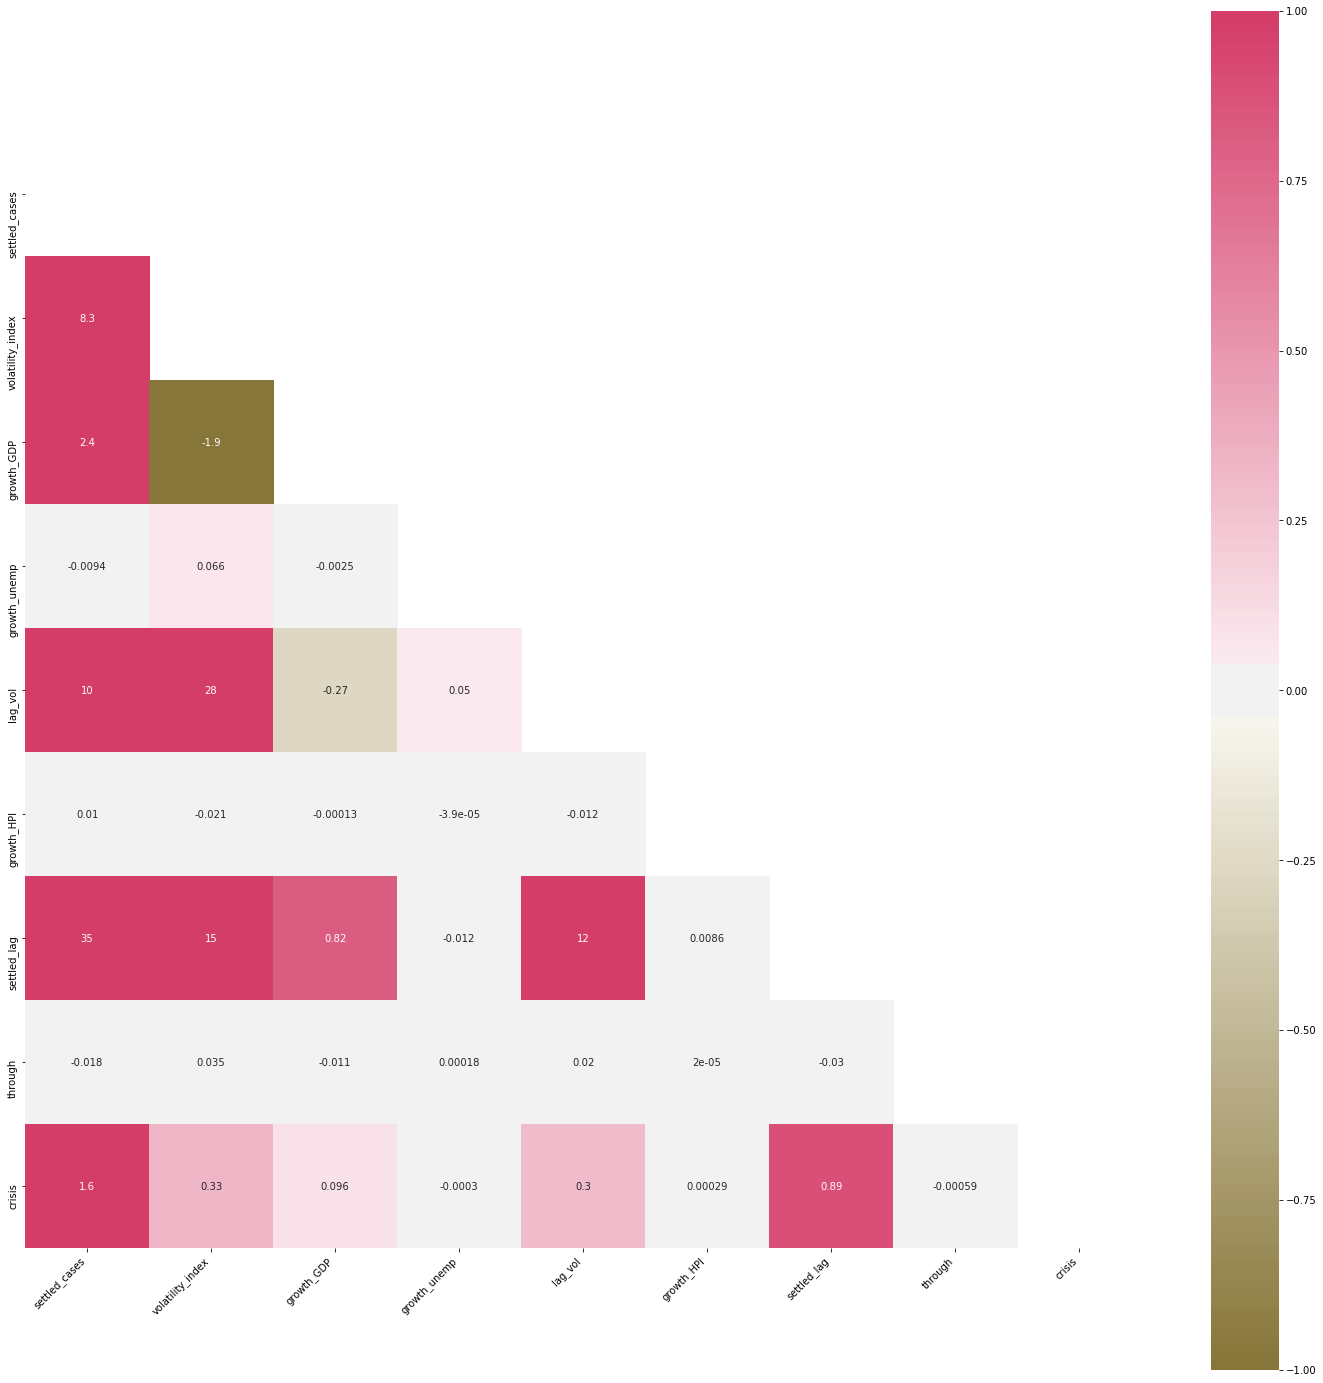

In [555]:
cov = data.cov()
plt.subplots(figsize=(25,25))
ax = sns.heatmap(
    cov, 
    mask=mask,
    vmin=-1, vmax=1, center=0,
      cmap=sns.diverging_palette(70, 720, n=299),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

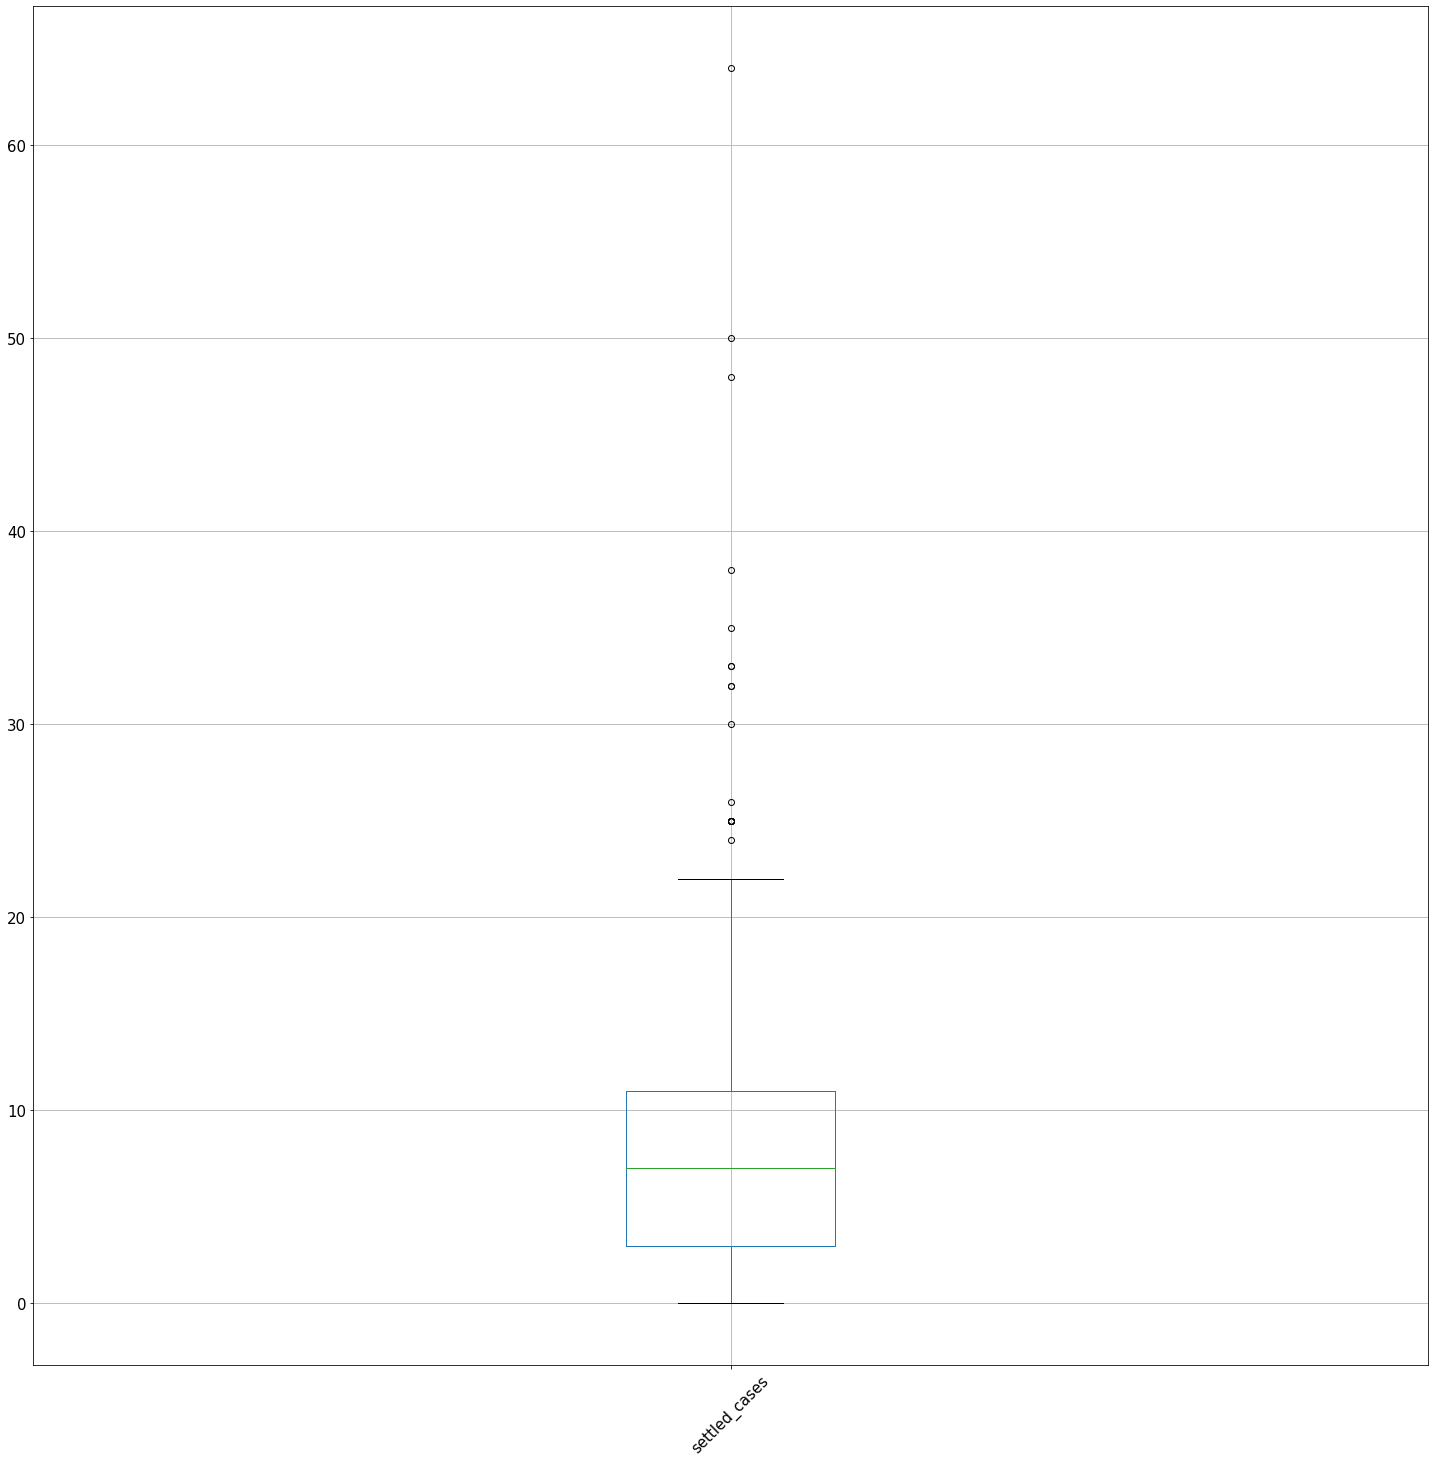

In [556]:
ax = dft[['settled_cases']].boxplot(grid=True, rot=45, fontsize=15,figsize='25,25')

plt.show()

In [558]:
#general statistics 
desc = pd.concat([
    data.describe().loc[['mean','std']],
    data.agg(['skew','kurt','median'])
])
desc

desc.to_latex('desc.tex', longtable=False)
desc

,settled_cases,volatility_index,growth_GDP,growth_unemp,lag_vol,growth_HPI,settled_lag,through,crisis
mean,8.589474,20.093404,0.068203,-0.001487,20.361825,0.003362,8.189474,0.007018,0.084211
std,8.286033,7.691934,0.860414,0.027743,8.063034,0.007233,8.411463,0.083623,0.278192
skew,2.719871,1.669316,-0.122420,0.115969,1.675849,-0.729854,2.690873,11.873897,3.010354
kurt,11.085490,4.378207,0.103280,0.305094,4.106235,1.033102,10.799591,139.971657,7.112095
median,7.000000,18.530000,-0.011071,0.000000,18.600000,0.003966,6.000000,0.000000,0.000000


In [61]:
#inflation
dft['growth_inf']=np.log(dft[['inflation']]).diff().dropna()
dft['inf_log']=np.log(dft[['inflation']]).dropna()
dft['inf_diff']=dft[['inflation']].diff().dropna()
dft['inf_sq'] = np.sqrt((dft['inflation']))
dft['inf_sq_diff'] = np.sqrt((dft['inflation'])).diff().dropna()

#volatility index
dft['growth_vol']=np.log(dft[['volatility_index']]).diff().dropna()
dft['vol_log']=np.log(dft[['volatility_index']]).dropna()
dft['vol_diff']=dft[['volatility_index']].diff().dropna()
dft['vol_sq'] = np.sqrt((dft['volatility_index']))
dft['vol_sq_diff'] = np.sqrt((dft['volatility_index'])).diff().dropna()

#lag volatilty 
dft['vol_lag'] = dft[['volatility_index']].shift(1)
dft['growth_vol_lag']=np.log(dft[['lag_vol']]).diff().dropna()
dft['growth_vol_lag_log']=np.log(dft[['lag_vol']])
dft['vol_lag_diff']=dft[['lag_vol']].diff().dropna()
dft['vol_lag_sq'] = np.sqrt((dft['lag_vol']))
dft['vol_sq_lag_diff'] = np.sqrt((dft['lag_vol'])).diff().dropna()

#HPI
dft['growth_HPI']=np.log(dft[['HPI']]).diff().dropna()
dft['HPI_log']=np.log(dft[['HPI']])
dft['HPI_diff']=(dft[['HPI']]).diff().dropna()
dft['HPI_sq'] = np.sqrt((dft['HPI']))
dft['HPI_sq_diff'] = np.sqrt((dft['HPI'])).diff().dropna()

#HPI lag
dft['HPI_lag']=dft['HPI'].shift(-12)
dft['growth_HPI_lag']=np.log(dft[['HPI']]).diff().dropna()
dft['HPI_lag_log']=np.log(dft[['lag_house']]).dropna()
dft['HPI_diff_lag']=dft[['lag_house']].diff().dropna()
dft['HPI_sq_lag'] = np.sqrt((dft['HPI_lag']))
dft['HPI_sq_diff_lag'] = np.sqrt((dft['HPI_lag'])).diff().dropna()

#GDP
dft[['GDP2']]=dft['GDP']-100
dft['growth_GDP']=np.log(dft[['GDP']]).diff().dropna()
dft['GDP_log']=np.log(dft[['GDP']]).dropna()
dft['GDP_diff']=(dft[['GDP']]).diff().dropna()
dft['GDP_sq'] = np.sqrt((dft['GDP']))
dft['GDP_sq_diff'] = np.sqrt((dft['GDP'])).diff().dropna()

#unemp

dft['growth_unemp']=np.log(dft[['unemp']]).diff().dropna()
dft['unemp_log']=np.log(dft[['unemp']]).dropna()
dft['unemp_diff']=(dft[['unemp']]).diff().dropna()
dft['unemp_sq'] = np.sqrt((dft['unemp']))
dft['unemp_sq_diff'] = np.sqrt((dft['unemp'])).diff().dropna()


#CASES
#all

dft['growth_all']=np.log(dft[['all_cases']]).diff().dropna()
dft['all_log']=np.log(dft[['all_cases']]).dropna()
dft['all_diff']=(dft[['all_cases']]).diff().dropna()
dft['all_cases_sq'] = np.sqrt((dft['all_cases']))
dft['all_cases_sq_diff'] = np.sqrt((dft['all_cases'])).diff().dropna()

#all lag 
dft['all_lag']=dft['all_cases'].shift(-12)
dft['growth_all_lag']=np.log(dft[['all_lag']]).diff().dropna()
dft['all_log_lag']=np.log(dft[['all_lag']]).dropna()
dft['all_lag_diff']=(dft[['all_lag']]).diff().dropna()
dft['all_lag_sq'] = np.sqrt((dft['all_lag']))
dft['all_lag_sq_diff'] = np.sqrt((dft['all_lag'])).diff().dropna()

#settled

dft['growth_settled']=np.log(dft[['settled_cases']]+1).diff().dropna()
dft['settled_log']=np.log(dft[['settled_cases']]+1).dropna()
dft['settled_diff']=(dft[['settled_cases']]).diff().dropna()
dft['settled_cases_sq'] = np.sqrt((dft['settled_cases']))
dft['settled_cases_sq_diff'] = np.sqrt((dft['settled_cases'])).diff().dropna()

#lag settled
dft['settled_lag']=dft['settled_cases'].shift(1)
dft['settled_lag_diff']=(dft[['settled_lag']]).diff().dropna()

#all lag 
dft['settled_lag']=dft['settled_cases'].shift(-12)
dft['growth_settled_lag']=np.log(dft[['settled_lag']]+1).diff().dropna()
dft['settled_log_lag']=np.log(dft[['settled_lag']]+1).dropna()
dft['settled_lag_diff']=(dft[['settled_lag']]).diff().dropna()
dft['settled_lag_sq'] = np.sqrt((dft['settled_lag']))
dft['settled_lag_sq_diff'] = np.sqrt((dft['settled_lag'])).diff().dropna()

#proportion
dft['marcin']=np.log((dft['settled_cases']/dft['all_cases'])+1)
dft['marcin2']=np.log((dft['settled_cases']/dft['all_cases'])+1).diff().dropna()
dft['marcin3']=(dft['settled_cases']/dft['all_cases'])
dft['marcin4']=(dft['settled_cases']/dft['all_cases']).diff().dropna()
dft['marcin5']=(dft['settled_cases_sq']/dft['all_cases_sq'])
dft['marcin6']=(dft['settled_cases_sq']/dft['all_cases_sq']).diff().dropna()
dft

<ipython-input-61-9e4e644975ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['growth_inf']=np.log(dft[['inflation']]).diff().dropna()
<ipython-input-61-9e4e644975ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['inf_log']=np.log(dft[['inflation']]).dropna()


,volatility_index,peak,through,contraction,expansion,HPI,GDP,unemp,lag_vol,lag_house,Eq2gdp,all_cases,settled_cases,ongoing_cases,dismissed_cases,inflation,crisis,growth_inf,inf_log,inf_diff,inf_sq,inf_sq_diff,growth_vol,vol_log,vol_diff,vol_sq,vol_sq_diff,vol_lag,growth_vol_lag,growth_vol_lag_log,vol_lag_diff,vol_lag_sq,vol_sq_lag_diff,growth_HPI,HPI_log,HPI_diff,HPI_sq,HPI_sq_diff,HPI_lag,growth_HPI_lag,HPI_lag_log,HPI_diff_lag,HPI_sq_lag,HPI_sq_diff_lag,GDP2,growth_GDP,GDP_log,GDP_diff,GDP_sq,GDP_sq_diff,growth_unemp,unemp_log,unemp_diff,unemp_sq,unemp_sq_diff,growth_all,all_log,all_diff,all_cases_sq,all_cases_sq_diff,all_lag,growth_all_lag,all_log_lag,all_lag_diff,all_lag_sq,all_lag_sq_diff,growth_settled,settled_log,settled_diff,settled_cases_sq,settled_cases_sq_diff,settled_lag,settled_lag_diff,growth_settled_lag,settled_log_lag,settled_lag_sq,settled_lag_sq_diff,marcin,marcin2,marcin3,marcin4,marcin5,marcin6
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-02-29,17.04,0.0,0.0,0.0,1.0,81.403,99.295633,5.5,19.460000,116.918000,0.849422,20,13,0,7,2.26,0,NaN,0.815365,NaN,1.503330,NaN,NaN,2.835564,NaN,4.127953,NaN,NaN,NaN,2.968361,NaN,4.411349,NaN,NaN,4.399412,NaN,9.022361,NaN,83.600,NaN,4.761473,NaN,9.143304,NaN,-0.704367,NaN,4.598102,NaN,9.964719,NaN,NaN,1.704748,NaN,2.345208,NaN,NaN,2.995732,NaN,4.472136,NaN,17.0,NaN,2.833213,NaN,4.123106,NaN,NaN,2.639057,NaN,3.605551,NaN,12.0,NaN,NaN,2.564949,3.464102,NaN,0.500775,NaN,0.650000,NaN,0.806226,NaN
1996-03-31,18.88,0.0,0.0,0.0,1.0,81.669,99.364011,5.5,17.010000,117.931000,0.850484,14,11,0,3,2.26,0,0.000000,0.815365,0.00,1.503330,0.000000,0.102540,2.938103,1.84,4.345112,0.217159,17.04,-0.134560,2.833801,-2.450000,4.124318,-0.287031,0.003262,4.402674,0.266,9.037090,0.014729,83.915,0.003262,4.770100,1.013000,9.160513,0.017210,-0.635989,0.000688,4.598790,0.068378,9.968150,0.003430,0.000000,1.704748,0.0,2.345208,0.000000,-0.356675,2.639057,-6.0,3.741657,-0.730479,25.0,0.385662,3.218876,8.0,5.000000,0.876894,-0.154151,2.484907,-2.0,3.316625,-0.288926,17.0,5.0,0.325422,2.890372,4.123106,0.659004,0.579818,0.079043,0.785714,0.135714,0.886405,0.080179
1996-04-30,15.83,0.0,0.0,0.0,1.0,82.128,99.446837,5.6,16.950000,119.209000,0.869609,13,7,0,6,2.26,0,0.000000,0.815365,0.00,1.503330,0.000000,-0.176196,2.761907,-3.05,3.978693,-0.366419,18.88,-0.003534,2.830268,-0.060000,4.117038,-0.007280,0.005605,4.408279,0.459,9.062450,0.025360,84.324,0.005605,4.780878,1.278000,9.182810,0.022297,-0.553163,0.000833,4.599623,0.082826,9.972304,0.004154,0.018019,1.722767,0.1,2.366432,0.021224,-0.074108,2.564949,-1.0,3.605551,-0.136106,27.0,0.076961,3.295837,2.0,5.196152,0.196152,-0.405465,2.079442,-4.0,2.645751,-0.670873,15.0,-2.0,-0.117783,2.772589,3.872983,-0.250122,0.430783,-0.149036,0.538462,-0.247253,0.733799,-0.152606
1996-05-31,16.07,0.0,0.0,0.0,1.0,82.605,99.525036,5.6,18.110000,120.788000,0.869948,23,20,0,3,2.23,0,-0.013363,0.802002,-0.03,1.493318,-0.010011,0.015047,2.776954,0.24,4.008740,0.030047,15.83,0.066196,2.896464,1.160000,4.255585,0.138547,0.005791,4.414070,0.477,9.088729,0.026279,84.868,0.005791,4.794037,1.579000,9.212383,0.029573,-0.474964,0.000786,4.600409,0.078199,9.976224,0.003920,0.000000,1.722767,0.0,2.366432,0.000000,0.570545,3.135494,10.0,4.795832,1.190280,15.0,-0.587787,2.708050,-12.0,3.872983,-1.323169,0.965081,3.044522,13.0,4.472136,1.826385,13.0,-2.0,-0.133531,2.639057,3.605551,-0.267432,0.625706,0.194923,0.869565,0.331104,0.932505,0.198705
1996-06-30,13.68,0.0,0.0,0.0,1.0,83.052,99.583258,5.3,17.140000,122.332000,0.920656,7,4,0,3,2.25,0,0.008929,0.810930,0.02,1.500000,0.006682,-0.161019,2.615935,-2.39,3.698648,-0.310092,16.07,-0.055049,2.841415,-0.970000,4.140048,-0.115536,0.005397,4.419467,0.447,9.113287,0.024558,85.402,0.005397,4.806739,1.544000,9.241320,0.028937,-0.416742,0.000585,4.600994,0.058222,9.979141,0.002918,-0.055060,1.667707,-0.3,2.302173,-0.064259,-1.189584,1.945910,-16.0,2.645751,-2.150080,11.0,-0.310155,2.397895,-4.0,

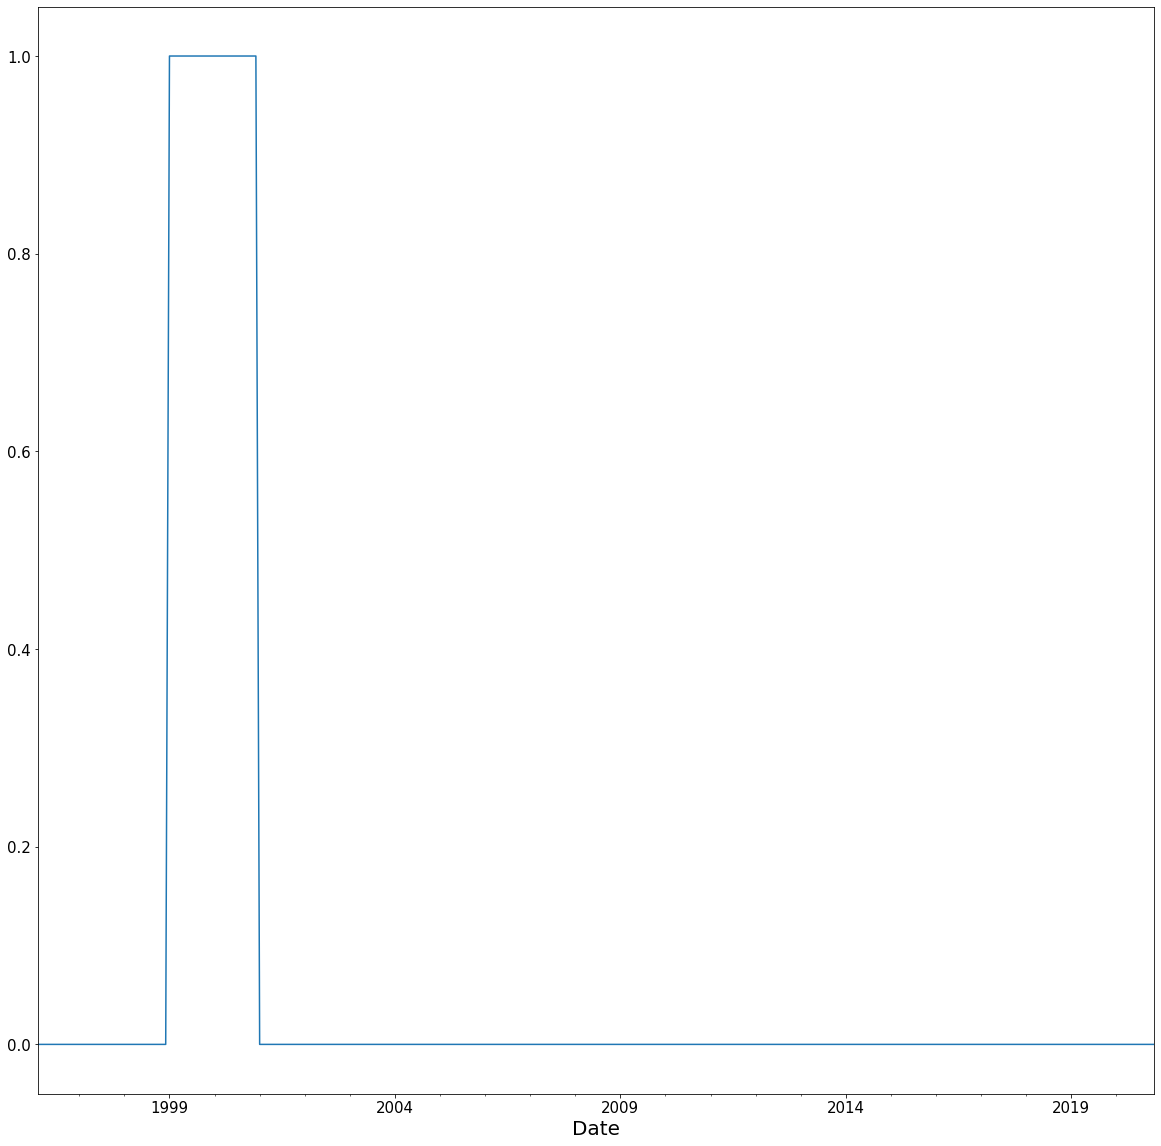

In [62]:
dft['crisis'] = \
    np.where((dft.index  >= '1999-01-31') & (dft.index <= '2000-12-31'),
             1,
             0)
dft['crisis'].plot()

In [64]:
dft2.columns

Index(['volatility_index', 'peak', 'through', 'contraction', 'expansion',
       'HPI', 'GDP', 'unemp', 'lag_vol', 'lag_house', 'Eq2gdp', 'all_cases',
       'settled_cases', 'ongoing_cases', 'dismissed_cases', 'inflation',
       'crisis', 'growth_inf', 'inf_log', 'inf_diff', 'inf_sq', 'inf_sq_diff',
       'growth_vol', 'vol_log', 'vol_diff', 'vol_sq', 'vol_sq_diff', 'vol_lag',
       'growth_vol_lag', 'growth_vol_lag_log', 'vol_lag_diff', 'vol_lag_sq',
       'vol_sq_lag_diff', 'growth_HPI', 'HPI_log', 'HPI_diff', 'HPI_sq',
       'HPI_sq_diff', 'HPI_lag', 'growth_HPI_lag', 'HPI_lag_log',
       'HPI_diff_lag', 'HPI_sq_lag', 'HPI_sq_diff_lag', 'GDP2', 'growth_GDP',
       'GDP_log', 'GDP_diff', 'GDP_sq', 'GDP_sq_diff', 'growth_unemp',
       'unemp_log', 'unemp_diff', 'unemp_sq', 'unemp_sq_diff', 'growth_all',
       'all_log', 'all_diff', 'all_cases_sq', 'all_cases_sq_diff', 'all_lag',
       'growth_all_lag', 'all_log_lag', 'all_lag_diff', 'all_lag_sq',
       'all_lag_sq_diff', '

In [63]:
dft2=dft.dropna()
dft2.isnull().sum()

volatility_index    0
peak                0
through             0
contraction         0
expansion           0
                   ..
marcin2             0
marcin3             0
marcin4             0
marcin5             0
marcin6             0
Length: 83, dtype: int64

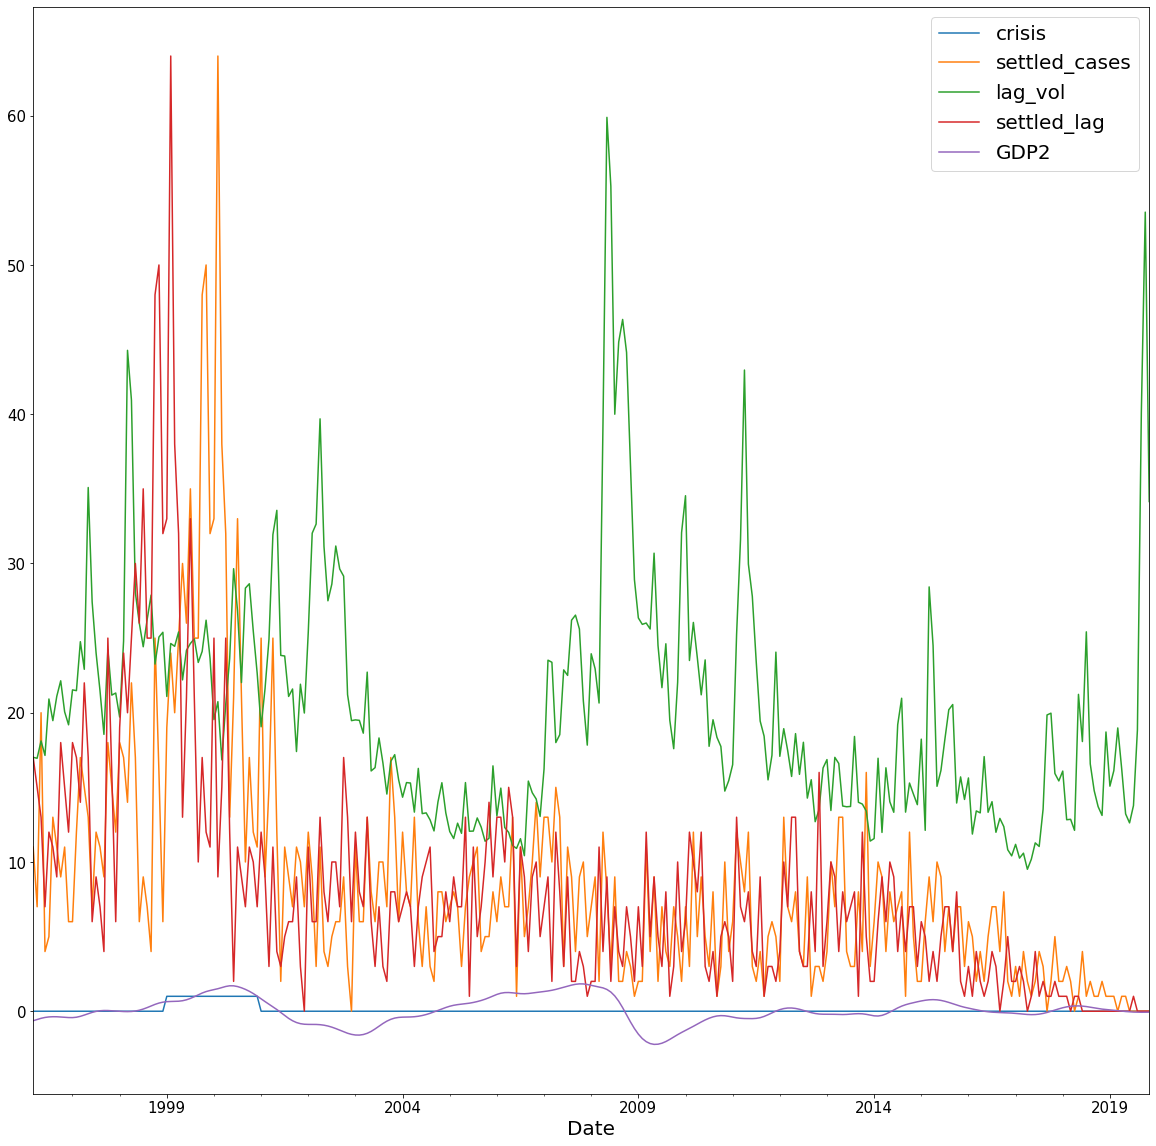

In [65]:
dft3=dft2.iloc[:286]
dft3.to_csv('mathias.csv')
dft3[['crisis','settled_cases','lag_vol','settled_lag','GDP2']].plot()

In [67]:
data=dft3[['settled_cases','volatility_index','GDP2','growth_unemp','lag_vol','growth_HPI','settled_lag','through','crisis','peak']]

In [76]:
data.to_csv('business_cycle_thesis.csv')

In [22]:
data[['through','peak','crisis']].sum()

through     2.0
peak        2.0
crisis     24.0
dtype: float64

import feather
path = 'my_data.feather'
feather.write_dataframe(dft2, path)

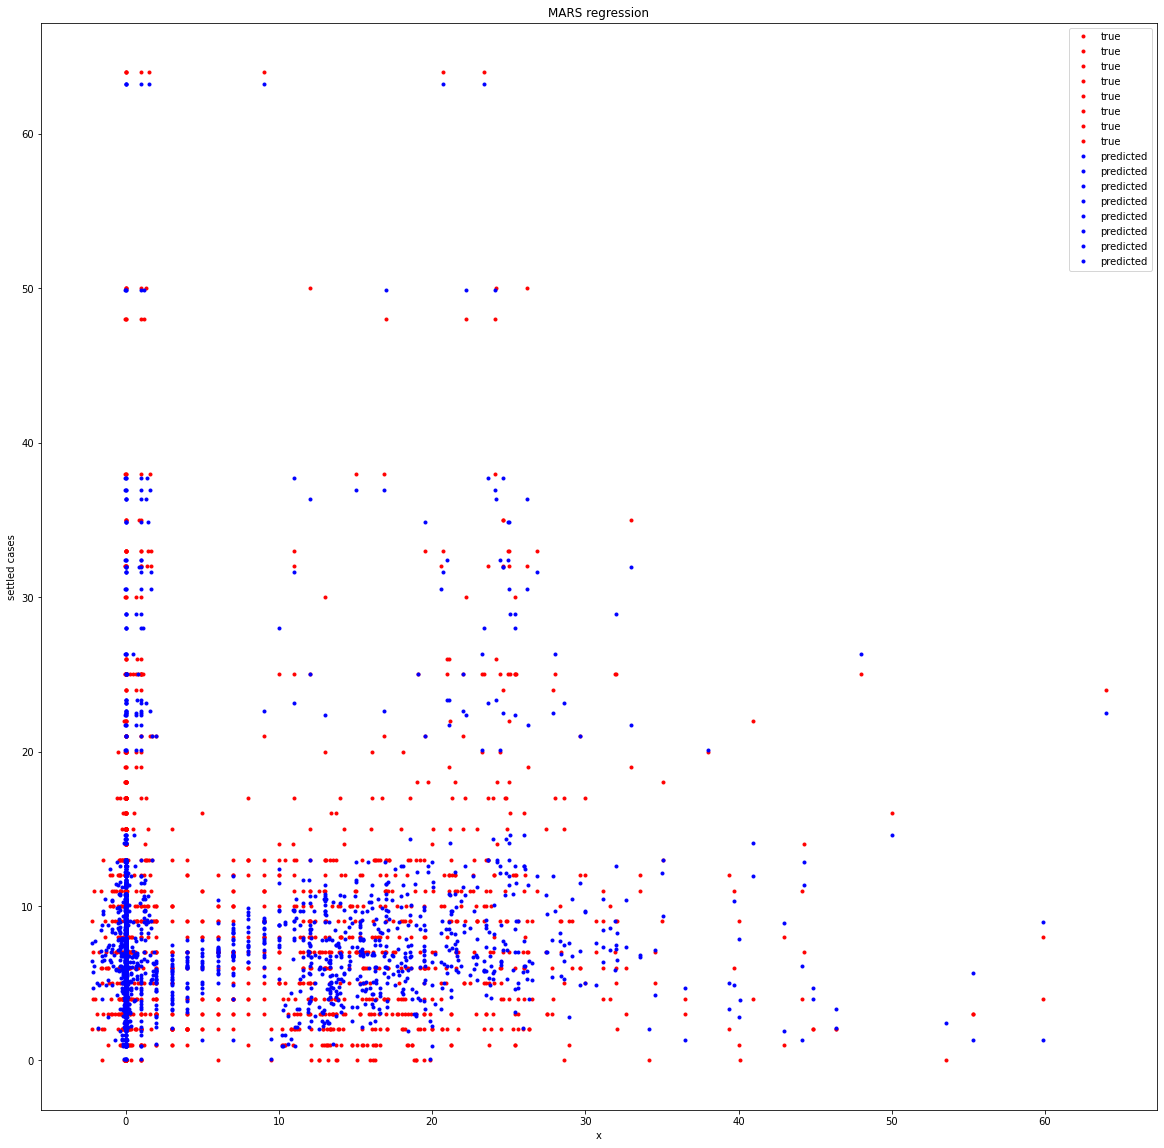

In [521]:
plt.plot(X5,y5,'r.',label="true")
#plt.plot(xTest,yTest,'b.')
plt.plot(X5,y_pred_mars,'b.',label="predicted")
plt.xlabel('x')
plt.ylabel('settled cases')
plt.title('MARS regression')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.legend(loc="upper right")
plt.show()

In [127]:
X5 = data[['volatility_index','growth_GDP','growth_unemp','lag_vol','growth_HPI','settled_lag','through','crisis']]
#X = dft3[['volatility_index','GDP_diff','unemp_diff','lag_vol','growth_HPI','settled_lag']]
#X2 = dft[['volatility_index','lag_vol','GDP','unemp','inflation','HPI','house_lag']]
#X3 = dft[['vol_diff','GDP_diff','unemp_diff','HPI_diff','HPI_diff_lag','inf_diff','vol_lag_diff']]
#X4 = dft3[['volatility_index','GDP_diff','unemp_diff','HPI_diff','lag_vol','all_lag_diff']]

#growth_all growth_settled GDP_diff unemp_diff HPI_diff_lag inf_diff all_diff vol_diff vol_lag_diff settled_diff

#y = dft['all_cases']
#y2 = dft['settled_cases']
#y3=dft['growth_all']
#y4=dft['growth_settled']
y5=dft3['settled_cases']
#y6=dft3['settled_diff']
#y7=dft3['marcin2']
#MARS linear dependent var

MARS_model = Earth(max_terms=500, max_degree=8,allow_missing=True)

MARS_model_fitted = MARS_model.fit(X5, y5)

y_pred_mars = MARS_model_fitted.predict(X5)
mars1 = MARS_model_fitted.summary()
print(mars1)

/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Earth Model
-----------------------------------------------------------------------------------------------------------------------------------
Basis Function                                                                                                Pruned  Coefficient  
-----------------------------------------------------------------------------------------------------------------------------------
(Intercept)                                                                                                   No      15.5681      
crisis                                                                                                        No      -299.68      
h(settled_lag-26)                                                                                             No      -6.97454     
h(26-settled_lag)                                                                                             No      -0.402461    
h(growth_GDP-1.65897)*crisis                                    

/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.33, random_state=None,shuffle=False)

In [139]:
#error train
a =np.sqrt(np.mean(np.power(y_train-MARS_model_fitted.predict(X_train),2)))

In [140]:
#error test
b = np.sqrt(np.mean(np.power(y_test-MARS_model_fitted.predict(X_test),2)))

In [141]:
a-b

0.7793995460479803

In [142]:
y_test.shape

(95,)

(0.0, 5.0)

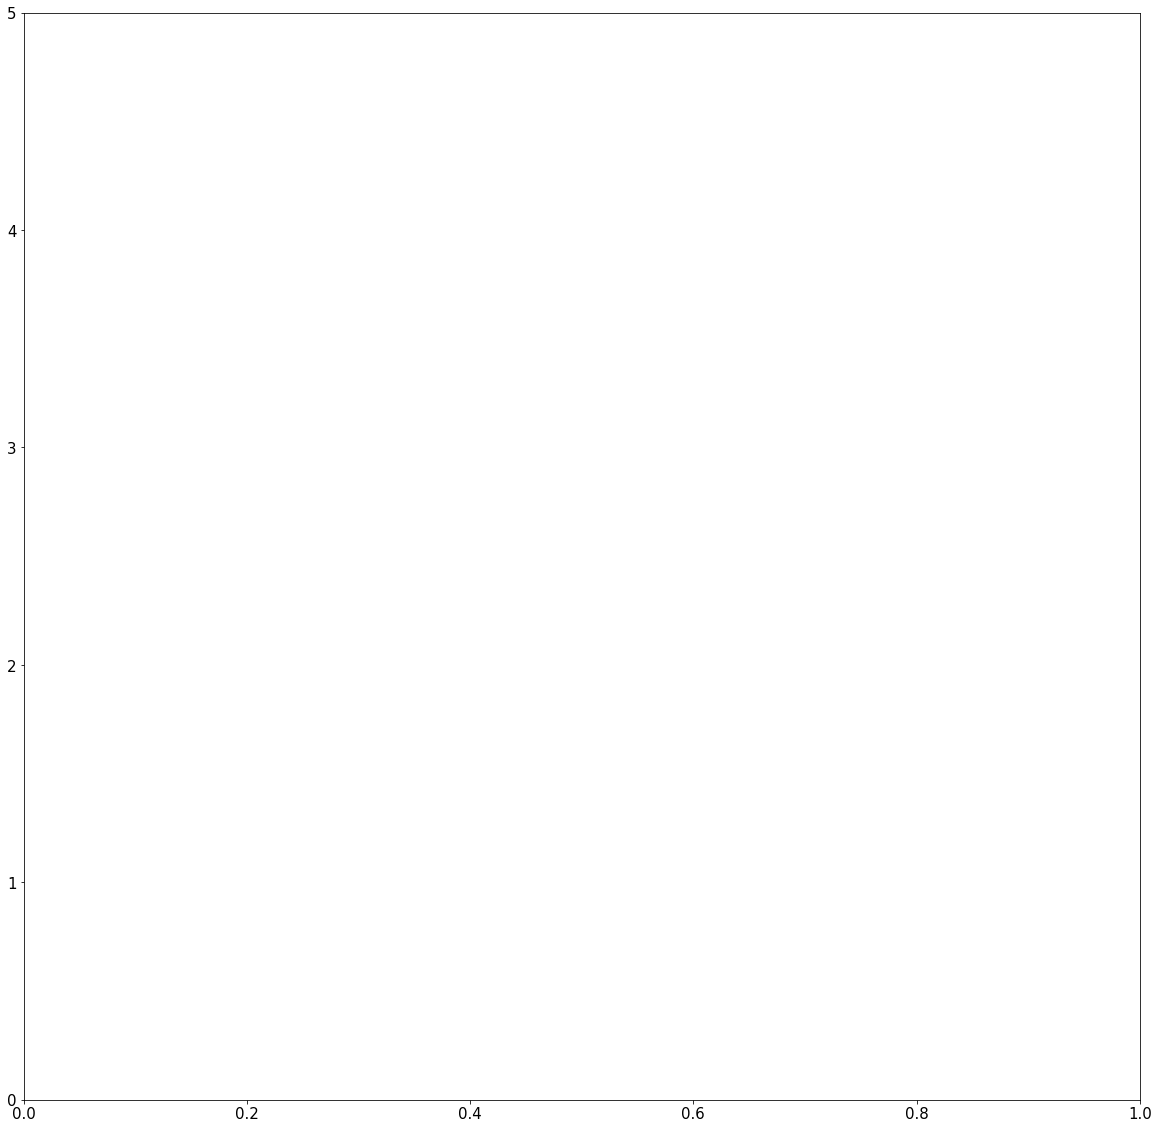

In [143]:
plt.ylim(0, 5)

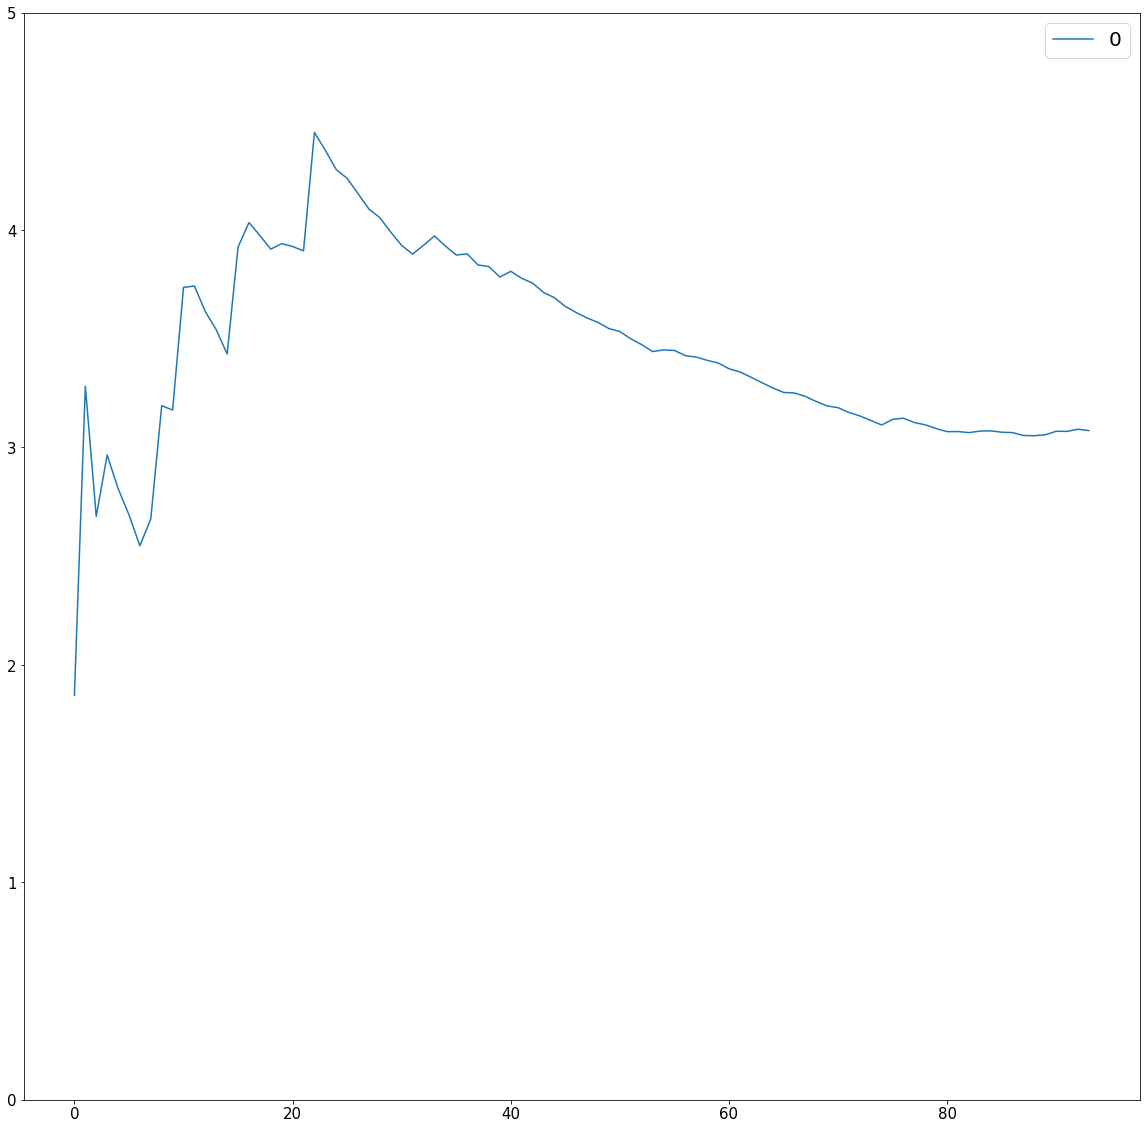

In [145]:
pd.DataFrame([
    np.sqrt(np.mean(np.power(y_test[:i]-MARS_model_fitted.predict(X_test[:i,:]),2)))
    for i in range(1,y_test.shape[0])
]).plot(ylim=(0,5))

In [134]:
#X3 = dft[['vol_diff','GDP_diff','unemp_diff','HPI_diff','HPI_diff_lag','inf_diff','vol_lag_diff']]
#X4 = dft3[['volatility_index','GDP_diff','unemp_diff','HPI_diff','lag_vol','all_lag_diff']].values
X5 = data[['volatility_index','growth_GDP','growth_unemp','lag_vol','growth_HPI','settled_lag','through','crisis']].values
#X = dft3[['volatility_index','GDP_diff','unemp_diff','lag_vol','growth_HPI','settled_lag']]
#X2 = dft[['volatility_index','lag_vol','GDP','unemp','inflation','HPI','house_lag']]
#X3 = dft[['vol_diff','GDP_diff','unemp_diff','HPI_diff','HPI_diff_lag','inf_diff','vol_lag_diff']]
#X4 = dft3[['volatility_index','GDP_diff','unemp_diff','HPI_diff','lag_vol','all_lag_diff']]

#growth_all growth_settled GDP_diff unemp_diff HPI_diff_lag inf_diff all_diff vol_diff vol_lag_diff settled_diff

#y = dft['all_cases']
#y2 = dft['settled_cases']
#y3=dft['growth_all']
#y4=dft['growth_settled']
y5=data['settled_cases'].values
#y7=dft3['marcin2'].values

In [231]:
lams = np.random.rand(287,8)
lams = lams* 8- 4
lams = np.exp(lams)
print(lams.shape)

#linear dependent variable
gam = LinearGAM(n_splines = 35, spline_order=4, callbacks=['diffs']).gridsearch(X5,y5,lam=lams)
gam_pred = gam.predict(X5)
gam.summary()

N/A% (0 of 287) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

(287, 8)


100% (287 of 287) |######################| Elapsed Time: 0:00:45 Time:  0:00:45


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     48.7395
Link Function:                     IdentityLink Log Likelihood:                                 -1181.4939
Number of Samples:                          285 AIC:                                             2462.4667
                                                AICc:                                            2484.0133
                                                GCV:                                               35.5068
                                                Scale:                                             24.7772
                                                Pseudo R-Squared:                                   0.6998
Feature Function                  Lam

<ipython-input-231-37a100e861f1>:9: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [ ]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rcParams.update({'font.size': 10})
## plotting 
plt.figure();
fig, axs = plt.subplots(1,8);

titles = ['volatility_index','GDP','growth_unemp','lag_vol','growth_HPI','settled_lag','through','crisis']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-110,110)
    ax.set_title(titles[i]);

In [108]:
coeff = gam.coef_

In [112]:
gam_coeff = pd.DataFrame(coeff, columns=['GAM coefficients']) 
print(gam_coeff.to_latex(longtable=True))

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.33, random_state=None,shuffle=False)

In [191]:
a= np.sqrt(np.mean(np.power(y_train-gam.predict(X_train),2)))
a

5.199231354595072

In [192]:
b=np.sqrt(np.mean(np.power(y_test-gam.predict(X_test),2)))
b

3.0564650893999583

In [149]:
a-b

2.1427662651951134

In [150]:
y_test.shape

(95,)

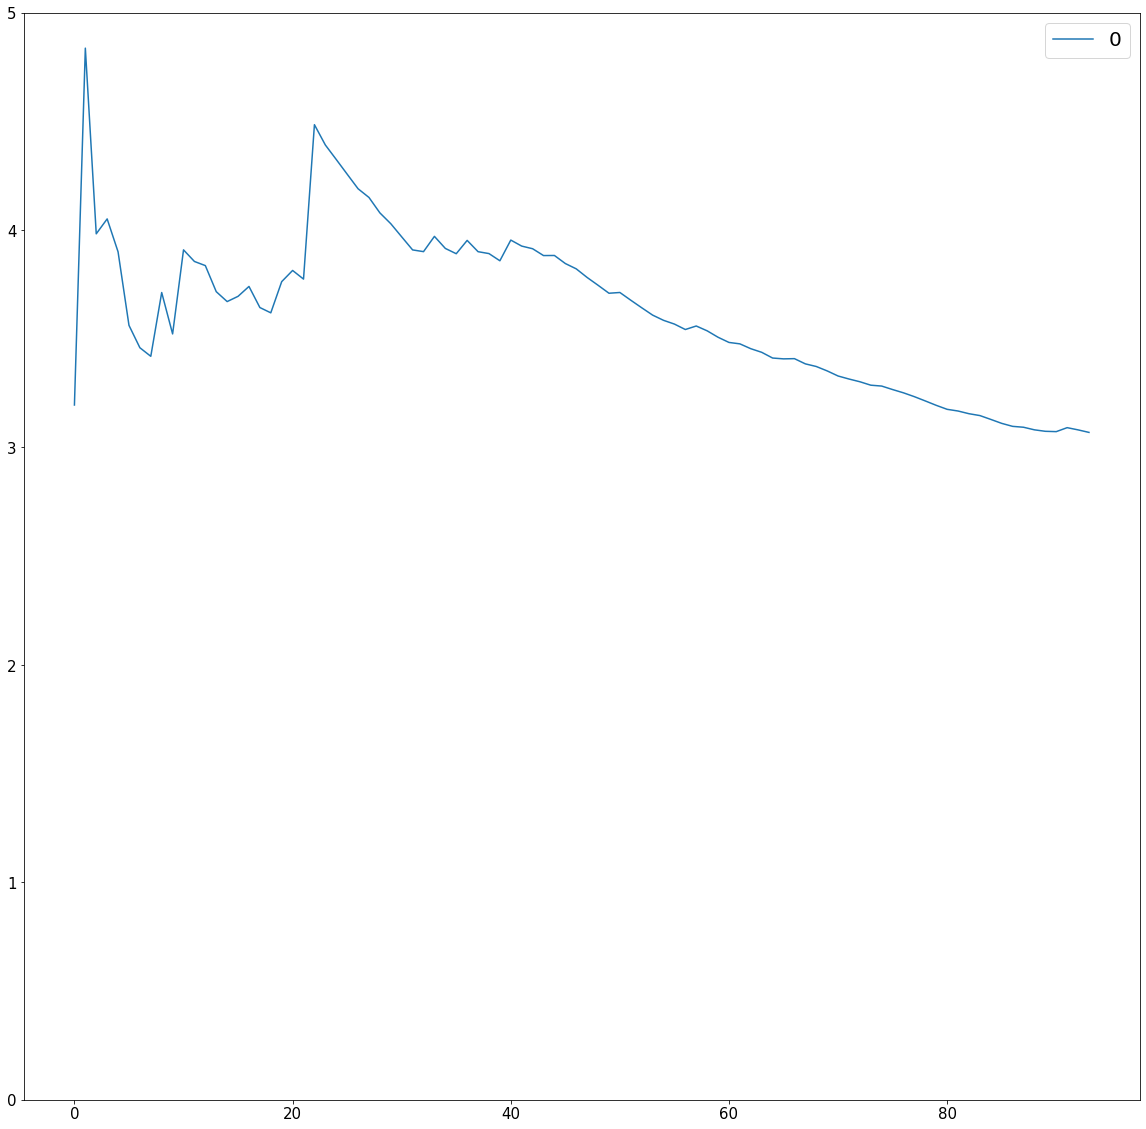

In [151]:
pd.DataFrame([
    np.sqrt(np.mean(np.power(y_test[:i]-gam.predict(X_test[:i,:]),2)))
    for i in range(1,y_test.shape[0])
]).plot(ylim=(0,5))

<Figure size 1440x1440 with 0 Axes>

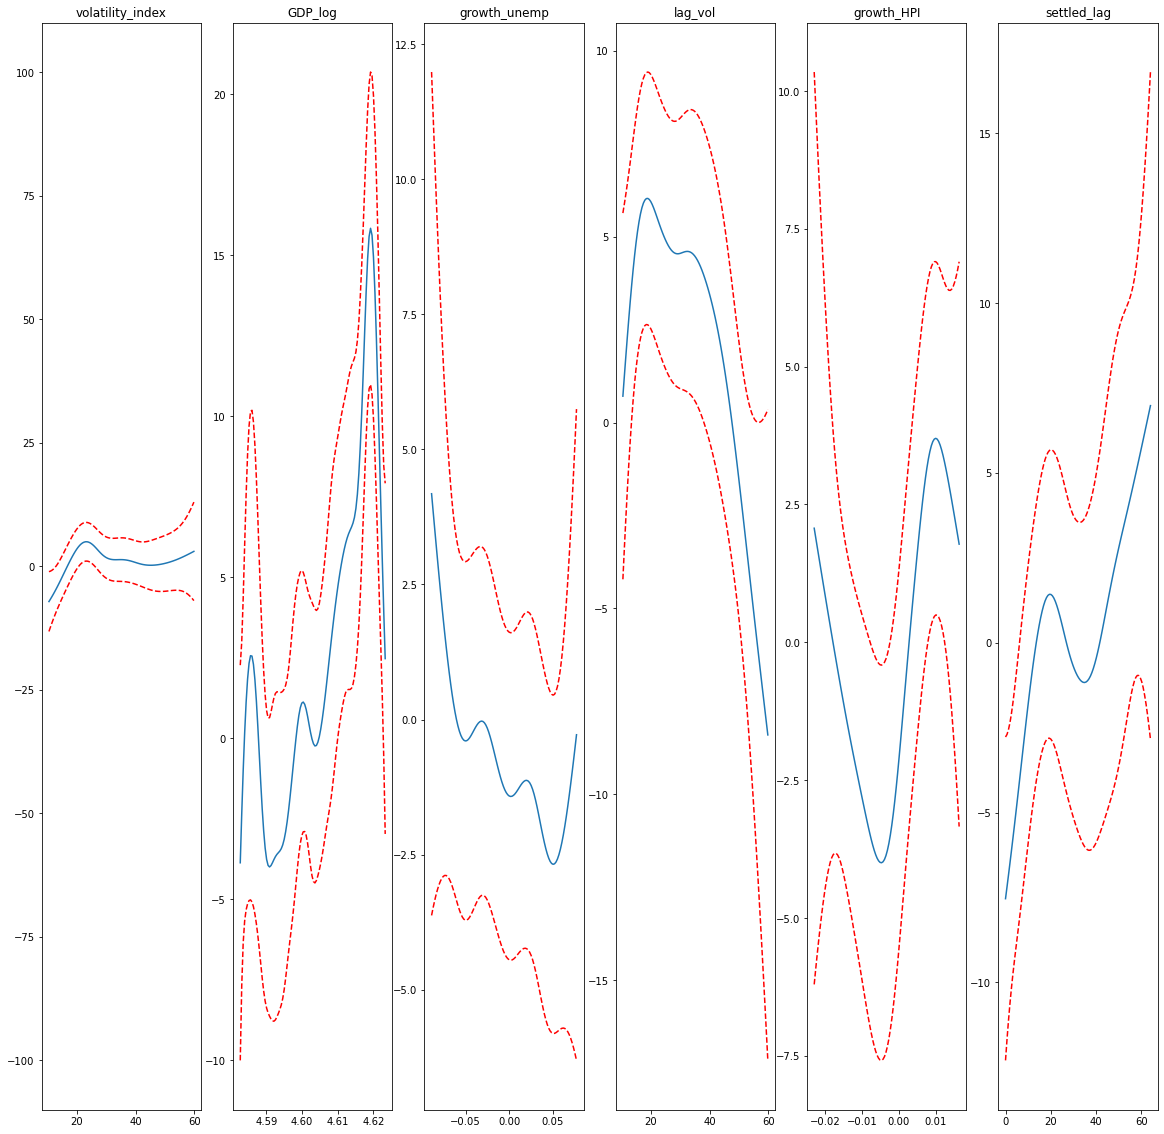

In [384]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rcParams.update({'font.size': 10})
## plotting 
plt.figure();
fig, axs = plt.subplots(1,6);

titles = ['volatility_index','GDP_log','growth_unemp','lag_vol','growth_HPI','settled_lag']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-110,110)
    ax.set_title(titles[i]);

In [631]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
#different specifications 
X5 = data[['volatility_index','growth_GDP','growth_unemp','lag_vol','growth_HPI','settled_lag','through','crisis']]
y5 = data['settled_cases']
X5 = sm.add_constant(X5)
model1 = sm.OLS(y5, X5).fit(cov_type='HAC',cov_kwds={'maxlags':6})

import statsmodels.formula.api as smf
formula = 'settled_cases ~ volatility_index+growth_GDP+growth_unemp+lag_vol+growth_HPI+settled_lag+through+crisis'
model_glm = smf.glm(formula = formula, data=data, family=sm.families.Gamma())
a = model_glm.fit()
stargazer = Stargazer([model1,a])
stargazer.custom_columns(['OLS w HAC errors','GLM'],[1, 1,])
stargazer

/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:274: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn(("The %s link function does not respect the domain "


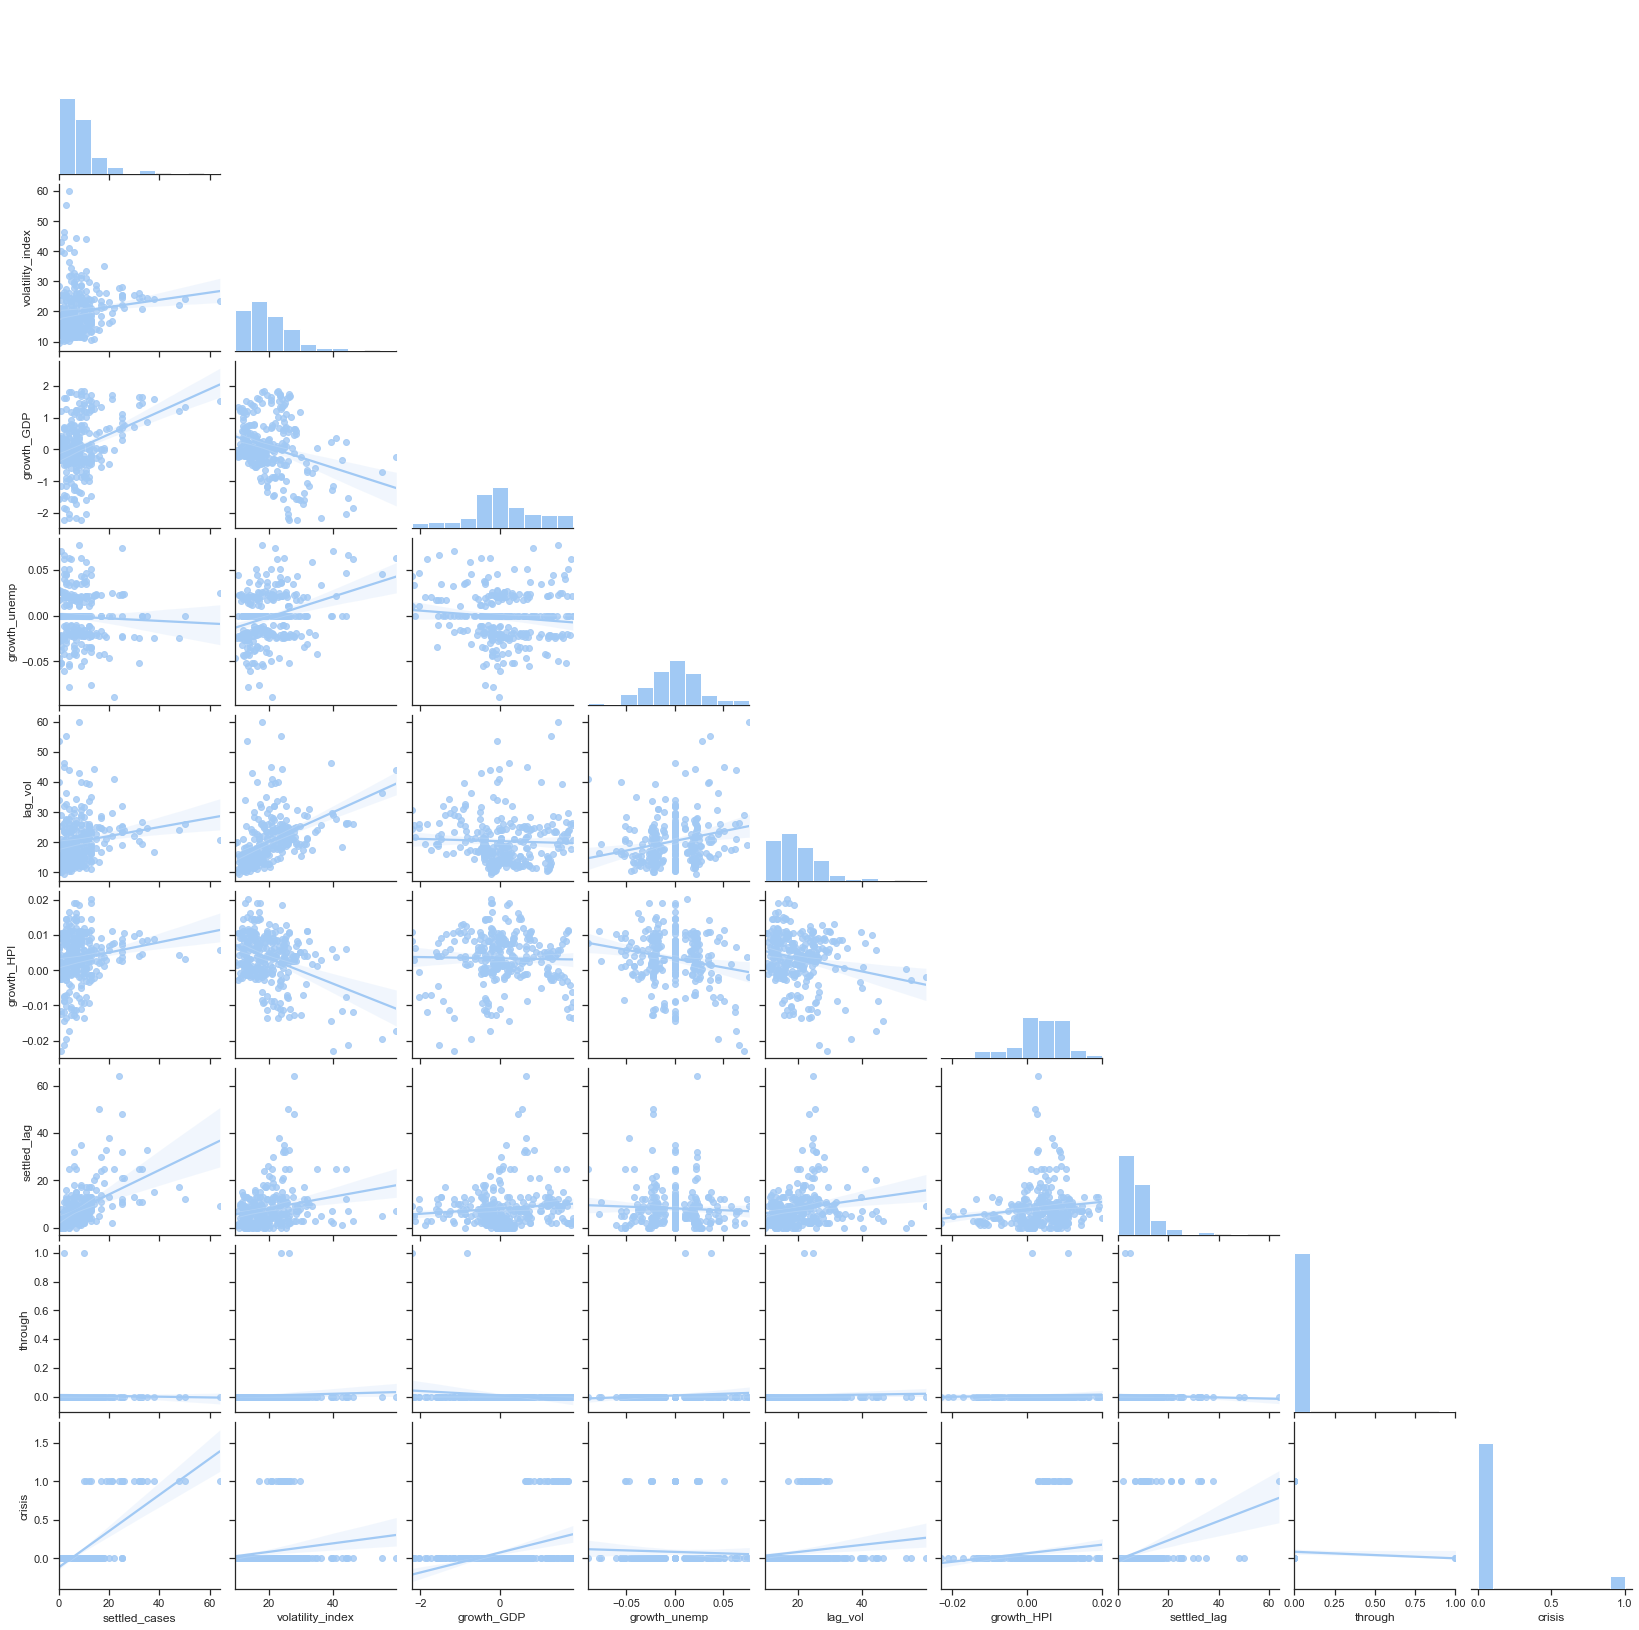

In [588]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.set_palette("pastel")
paint = sns.pairplot(data, diag_kind="hist",corner=True, palette='husl',kind='reg')
plt.show()

In [24]:
data['vol_log']=np.log(data['volatility_index']).dropna()
data['vol_lag_log']=np.log(data[['lag_vol']]).dropna()

data['settled1']=data.settled_cases+1
data['settled_log']=np.log(data['settled1']).dropna()
data['settled_lag_log']=np.log(data['settled_cases'].shift(1))

In [63]:
dft2

,volatility_index,peak,through,contraction,expansion,HPI,GDP,unemp,lag_vol,lag_house,Eq2gdp,all_cases,settled_cases,ongoing_cases,dismissed_cases,inflation,growth_inf,inf_log,inf_diff,inf_sq,inf_sq_diff,growth_vol,vol_log,vol_diff,vol_sq,vol_sq_diff,vol_lag,growth_vol_lag,growth_vol_lag_log,vol_lag_diff,vol_lag_sq,vol_sq_lag_diff,growth_HPI,HPI_log,HPI_diff,HPI_sq,HPI_sq_diff,HPI_lag,growth_HPI_lag,HPI_lag_log,HPI_diff_lag,HPI_sq_lag,HPI_sq_diff_lag,GDP2,growth_GDP,GDP_log,GDP_diff,GDP_sq,GDP_sq_diff,growth_unemp,unemp_log,unemp_diff,unemp_sq,unemp_sq_diff,growth_all,all_log,all_diff,all_cases_sq,all_cases_sq_diff,all_lag,growth_all_lag,all_log_lag,all_lag_diff,all_lag_sq,all_lag_sq_diff,growth_settled,settled_log,settled_diff,settled_cases_sq,settled_cases_sq_diff,settled_lag,settled_lag_diff,growth_settled_lag,settled_log_lag,settled_lag_sq,settled_lag_sq_diff,marcin,marcin2,marcin3,marcin4,marcin5,marcin6,crisis
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-03-31,18.88,0.0,0.0,0.0,1.0,81.669,99.364011,5.5,17.01,117.931000,0.850484,14,11,0,3,2.26,0.000000,0.815365,0.00,1.503330,0.000000,0.102540,2.938103,1.84,4.345112,0.217159,17.04,-0.134560,2.833801,-2.45,4.124318,-0.287031,0.003262,4.402674,0.266,9.037090,0.014729,83.915,0.003262,4.770100,1.013000,9.160513,0.017210,-0.635989,0.000688,4.598790,0.068378,9.968150,0.003430,0.000000,1.704748,0.0,2.345208,0.000000,-0.356675,2.639057,-6.0,3.741657,-0.730479,25.0,0.385662,3.218876,8.0,5.000000,0.876894,-0.154151,2.484907,-2.0,3.316625,-0.288926,17.0,5.0,0.325422,2.890372,4.123106,0.659004,0.579818,0.079043,0.785714,0.135714,0.886405,0.080179,0
1996-04-30,15.83,0.0,0.0,0.0,1.0,82.128,99.446837,5.6,16.95,119.209000,0.869609,13,7,0,6,2.26,0.000000,0.815365,0.00,1.503330,0.000000,-0.176196,2.761907,-3.05,3.978693,-0.366419,18.88,-0.003534,2.830268,-0.06,4.117038,-0.007280,0.005605,4.408279,0.459,9.062450,0.025360,84.324,0.005605,4.780878,1.278000,9.182810,0.022297,-0.553163,0.000833,4.599623,0.082826,9.972304,0.004154,0.018019,1.722767,0.1,2.366432,0.021224,-0.074108,2.564949,-1.0,3.605551,-0.136106,27.0,0.076961,3.295837,2.0,5.196152,0.196152,-0.405465,2.079442,-4.0,2.645751,-0.670873,15.0,-2.0,-0.117783,2.772589,3.872983,-0.250122,0.430783,-0.149036,0.538462,-0.247253,0.733799,-0.152606,0
1996-05-31,16.07,0.0,0.0,0.0,1.0,82.605,99.525036,5.6,18.11,120.788000,0.869948,23,20,0,3,2.23,-0.013363,0.802002,-0.03,1.493318,-0.010011,0.015047,2.776954,0.24,4.008740,0.030047,15.83,0.066196,2.896464,1.16,4.255585,0.138547,0.005791,4.414070,0.477,9.088729,0.026279,84.868,0.005791,4.794037,1.579000,9.212383,0.029573,-0.474964,0.000786,4.600409,0.078199,9.976224,0.003920,0.000000,1.722767,0.0,2.366432,0.000000,0.570545,3.135494,10.0,4.795832,1.190280,15.0,-0.587787,2.708050,-12.0,3.872983,-1.323169,0.965081,3.044522,13.0,4.472136,1.826385,13.0,-2.0,-0.133531,2.639057,3.605551,-0.267432,0.625706,0.194923,0.869565,0.331104,0.932505,0.198705,0
1996-06-30,13.68,0.0,0.0,0.0,1.0,83.052,99.583258,5.3,17.14,122.332000,0.920656,7,4,0,3,2.25,0.008929,0.810930,0.02,1.500000,0.006682,-0.161019,2.615935,-2.39,3.698648,-0.310092,16.07,-0.055049,2.841415,-0.97,4.140048,-0.115536,0.005397,4.419467,0.447,9.113287,0.024558,85.402,0.005397,4.806739,1.544000,9.241320,0.028937,-0.416742,0.000585,4.600994,0.058222,9.979141,0.002918,-0.055060,1.667707,-0.3,2.302173,-0.064259,-1.189584,1.945910,-16.0,2.645751,-2.150080,11.0,-0.310155,2.397895,-4.0,3.316625,-0.556359,-1.435085,1.609438,-16.0,2.000000,-2.472136,7.0,-6.0,-0.559616,2.079442,2.645751,-0.959800,0.451985,-0.173721,0.571429,-0.298137,0.755929,-0.176576,0
1996-07-31,19.46,0.0,0.0,0.0,1.0,83.422,99.617908,5.5,20.92,123.686000,0.886795,7,5,0,2,2.29,0.017622,0.828552,0.04,1.513275,0.013275,0.352426,2.968361,5.78,4.411349,0.712701,13.68,0.199291,3.040706,3.78,4.573839,0.433790,0.004445,4.423912,0.370,9.133564,0.020277,85.845,0.004445,4.817746,1.354000,9.265258,0.023937,-0.382092,0.000348,4.601342,0.034650,9.980877,0.00

<ipython-input-60-609f6b3ff76f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['crisis'] = \


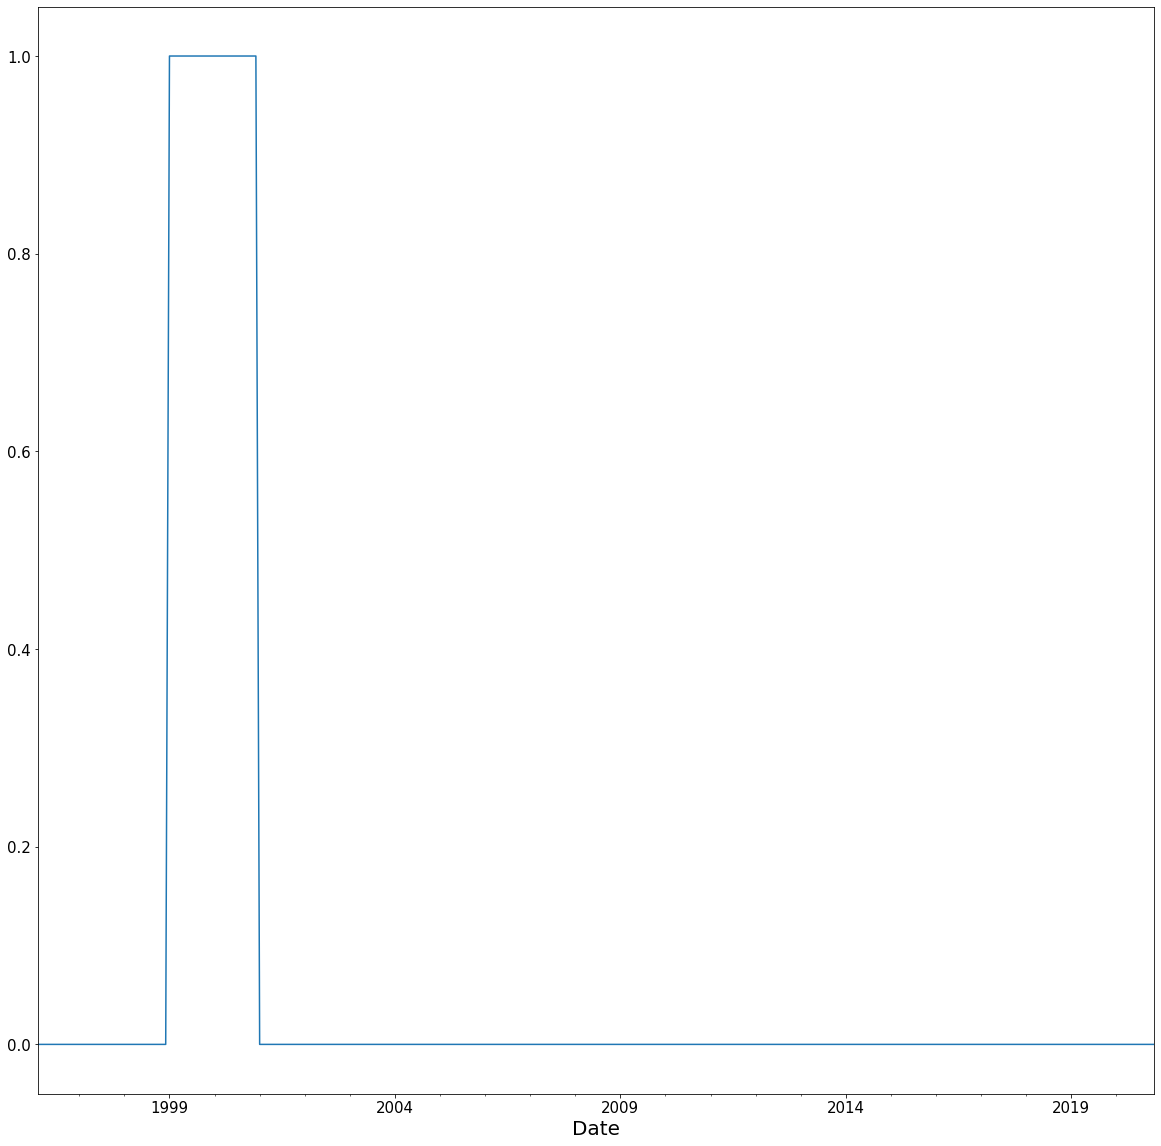

In [60]:
dft['crisis'] = \
    np.where((dft.index  >= '1999-01-31') & (dft.index <= '2000-12-31'),
             1,
             0)
dft['crisis'].plot()


In [67]:
X5 = dft3[['volatility_index','GDP2','growth_unemp','lag_vol','growth_HPI','settled_lag','through','crisis']]
#X = dft3[['volatility_index','GDP_diff','unemp_diff','lag_vol','growth_HPI','settled_lag']]
#X2 = dft[['volatility_index','lag_vol','GDP','unemp','inflation','HPI','house_lag']]
#X3 = dft[['vol_diff','GDP_diff','unemp_diff','HPI_diff','HPI_diff_lag','inf_diff','vol_lag_diff']]
#X4 = dft3[['volatility_index','GDP_diff','unemp_diff','HPI_diff','lag_vol','all_lag_diff']]

#growth_all growth_settled GDP_diff unemp_diff HPI_diff_lag inf_diff all_diff vol_diff vol_lag_diff settled_diff

#y = dft['all_cases']
#y2 = dft['settled_cases']
#y3=dft['growth_all']
#y4=dft['growth_settled']
y5=dft3['settled_cases']
#y6=dft3['settled_diff']
#y7=dft3['marcin2']
#MARS linear dependent var

MARS_model = Earth(max_terms=500, max_degree=8,allow_missing=True)

MARS_model_fitted = MARS_model.fit(X5, y5)

y_pred_mars = MARS_model_fitted.predict(X5)
mars1 = MARS_model_fitted.summary()
print(mars1)

/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Earth Model
-----------------------------------------------------------------------------------------------------------------------------------
Basis Function                                                                                                Pruned  Coefficient  
-----------------------------------------------------------------------------------------------------------------------------------
(Intercept)                                                                                                   No      15.5681      
crisis                                                                                                        No      -299.68      
h(settled_lag-26)                                                                                             No      -6.97454     
h(26-settled_lag)                                                                                             No      -0.402461    
h(GDP2-1.65897)*crisis                                          

/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [64]:
X1= dft3[['GDP', 'unemp','HPI','through', 'crisis', 'volatility_index','vol_lag', 'settled_lag']]
 
y1 = dft3['settled_cases']
                 
MARS_model = Earth(max_terms=500, max_degree=8,allow_missing=True)

MARS_model_fitted = MARS_model.fit(X1,y1)

y_pred_mars = MARS_model_fitted.predict(X1)
mars_log = MARS_model_fitted.summary()
print(mars_log)

/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Earth Model
-----------------------------------------------------------------------------------------------------------------
Basis Function                                                                              Pruned  Coefficient  
-----------------------------------------------------------------------------------------------------------------
(Intercept)                                                                                 No      -3887.12     
crisis                                                                                      No      68.904       
h(HPI-101.466)*crisis                                                                       No      -14.9466     
h(101.466-HPI)*crisis                                                                       No      -6.94403     
h(HPI-183.701)                                                                              No      -48.7717     
h(183.701-HPI)                                                              

/Users/vicar/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [57]:
data2=data.replace(-np.inf, np.nan).dropna()

In [65]:
X1= dft3[['GDP', 'unemp','HPI','through', 'crisis', 'volatility_index','vol_lag', 'settled_lag']].values
 
y1 = dft3['settled_cases'].values

lams = np.random.rand(287,8)
lams = lams* 8- 4
lams = np.exp(lams)
print(lams.shape)

(287, 8)


In [66]:
#linear dependent variable
gam = LinearGAM(n_splines = 35, spline_order=4, callbacks=['diffs']).gridsearch(X1,y1,lam=lams)
gam.summary()

100% (287 of 287) |######################| Elapsed Time: 0:00:42 Time:  0:00:42


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     54.6438
Link Function:                     IdentityLink Log Likelihood:                                 -1100.3177
Number of Samples:                          285 AIC:                                             2311.9231
                                                AICc:                                             2339.528
                                                GCV:                                               28.0021
                                                Scale:                                             18.5418
                                                Pseudo R-Squared:                                    0.781
Feature Function                  Lam

<ipython-input-66-7b7066b1dd81>:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


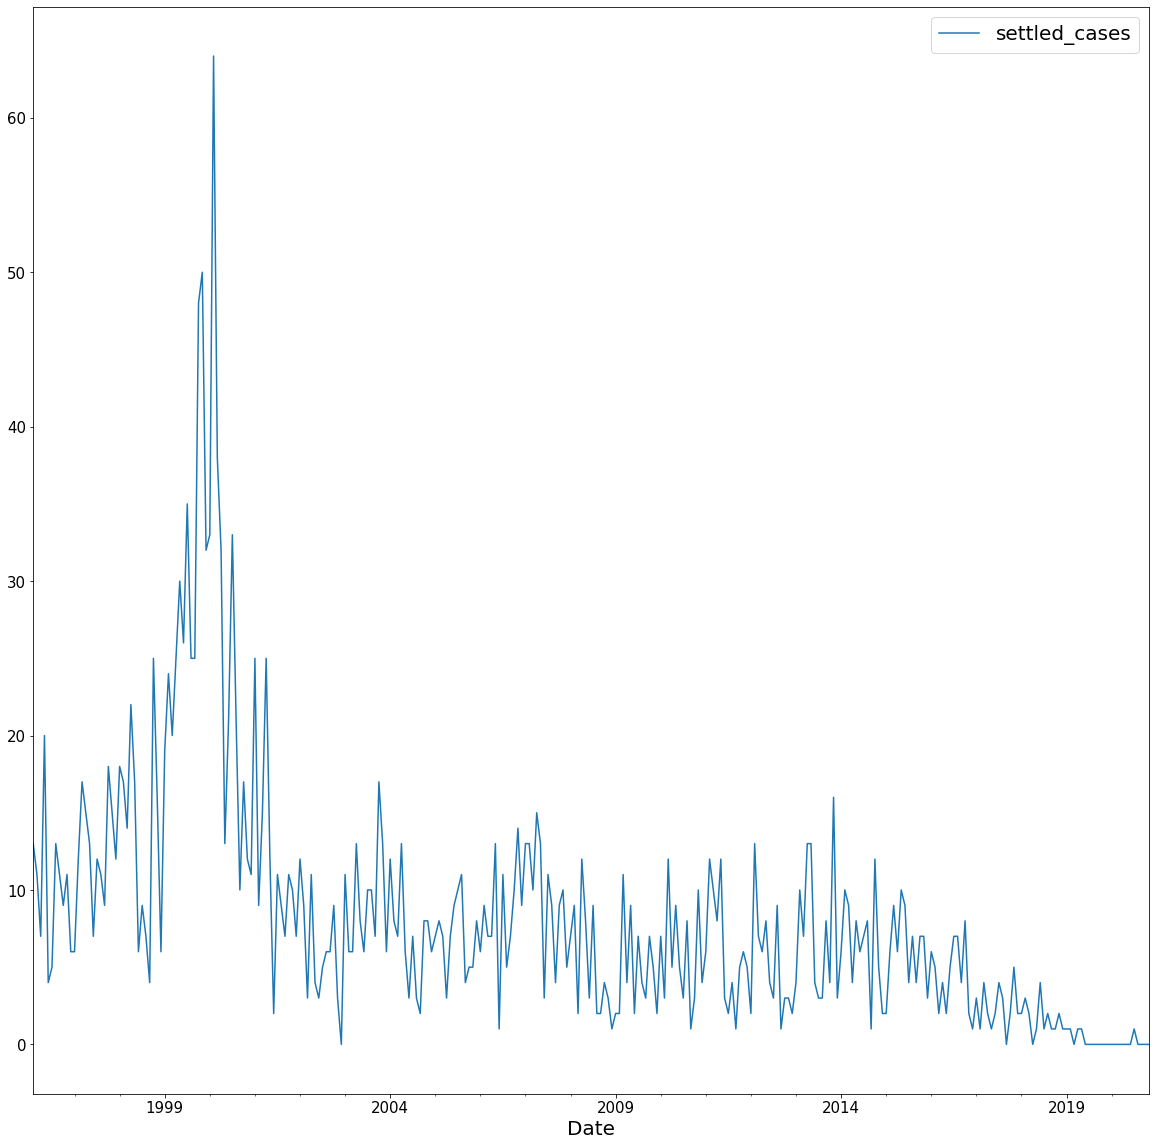

In [4]:
dft[['settled_cases']].plot()

In [ ]:
h(growth\_GDP-1.65897)*crisis*h(volatility\textunderscore index-22.64)

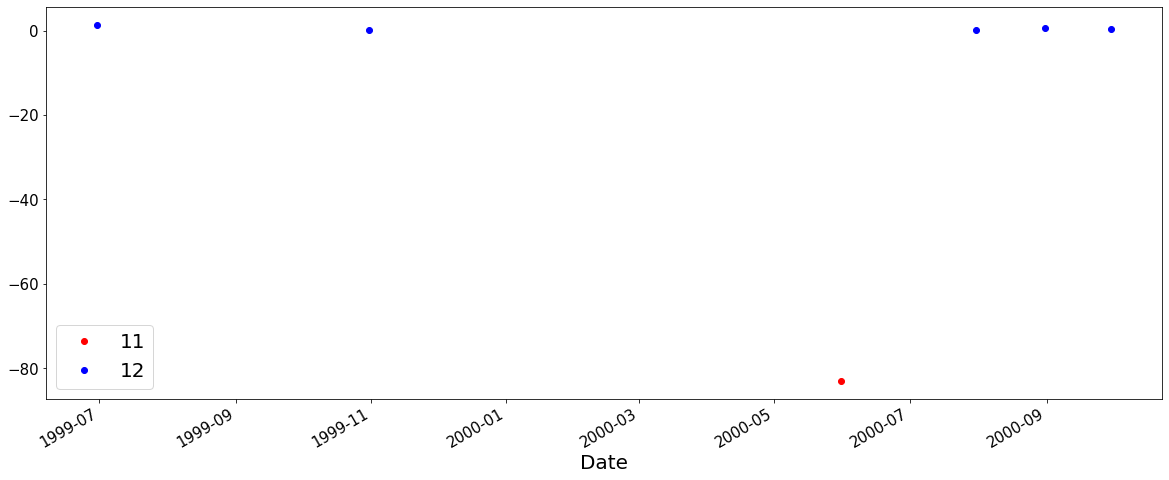

In [53]:
plt.figure(figsize=(20,8))
ax=plt.subplot(111)
ddft=dft.query('''
    GDP-(1.65897+100)>0 & \
    crisis==1 & \
    volatility_index-22.64>0 \
 ''').copy()

((ddft['GDP']-(1.65897+100))*ddft['crisis']*(ddft['volatility_index']-22.64)*-1808).to_frame('11').plot(ax=ax, c='red', style='o')

ddft=dft.query('''
    GDP-(1.65897+100)<0 & \
    crisis==1 & \
    volatility_index-22.64<0 \
 ''').copy()

((ddft['GDP']-(1.65897+100))*ddft['crisis']*(ddft['volatility_index']-22.64)).to_frame('12').plot(ax=ax, c='blue', style='o')

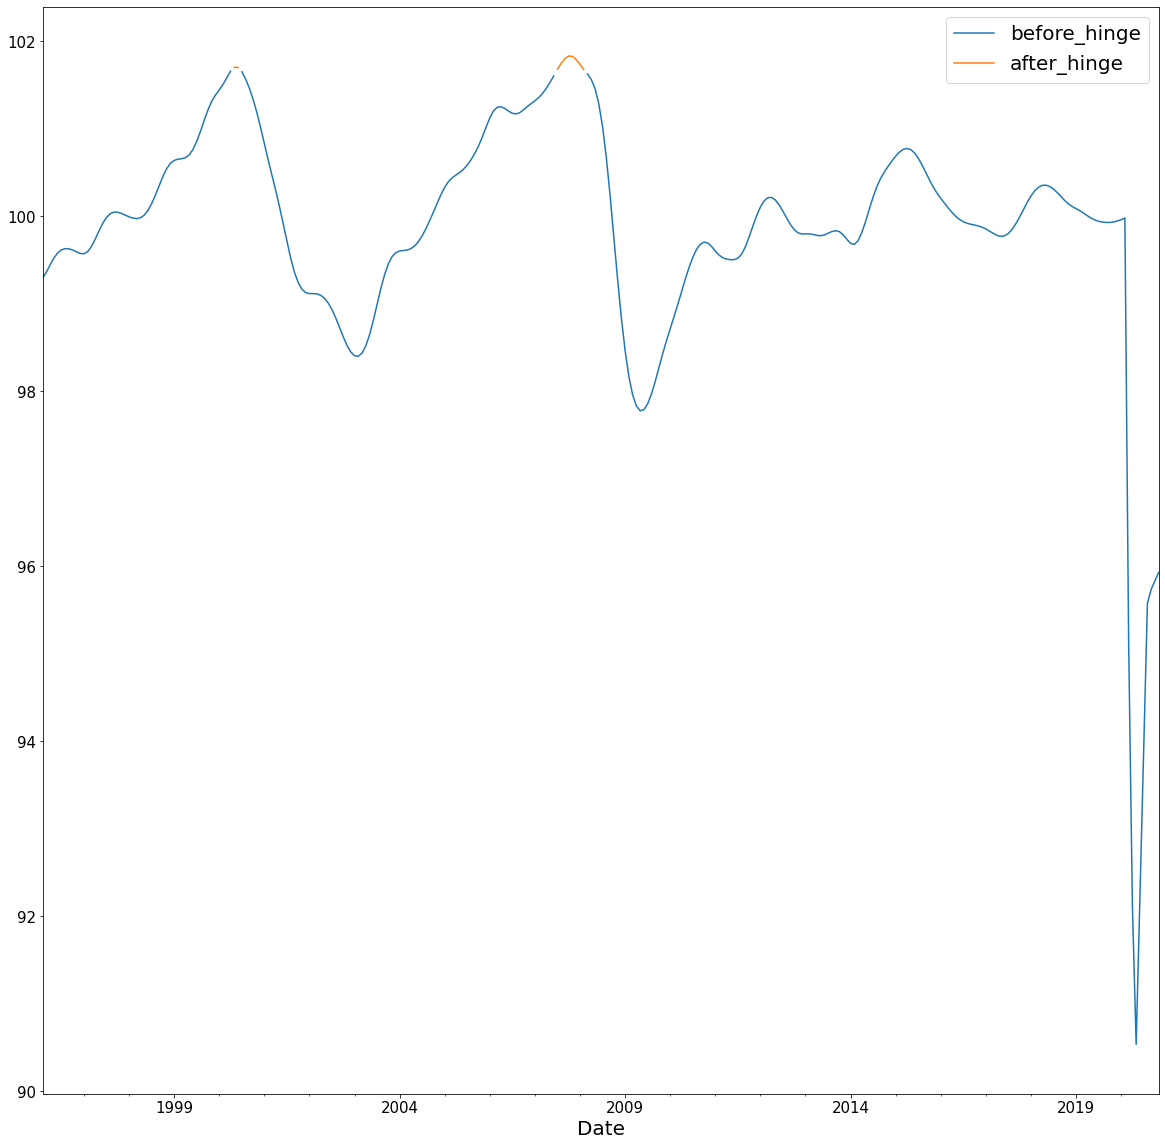

In [20]:
ddft=dft[['GDP']].copy()
ddft.columns=['before_hinge']
h=1.65897+100
ix=ddft['before_hinge']<h
ddft['after_hinge']=ddft['before_hinge']
ddft.loc[ix,'after_hinge']=np.nan
ddft.loc[~ix, 'before_hinge']=np.nan

ddft3=dft[['crisis']].copy()
ddft3.columns=['before_hinge']
ddft3['after_hinge']=ddft3['before_hinge']

ddft2=dft[['volatility_index']].copy()
ddft2.columns=['before_hinge']
h=22.64
ix=ddft2['before_hinge']<h
ddft2['after_hinge']=ddft2['before_hinge']
ddft2.loc[ix,'after_hinge']=np.nan
ddft2.loc[~ix, 'before_hinge']=np.nan



ddft.plot()

In [9]:
ddft=dft[['settled_cases']].copy()
ddft.columns=['before_hinge']
h=26
ix=ddft['before_hinge']<h
ddft['after_hinge']=ddft['before_hinge']
ddft.loc[ix,'after_hinge']=np.nan
ddft.loc[~ix, 'before_hinge']=np.nan

ddft.plot()

In [176]:
data['MA'] = data['settled_cases'].rolling(window=4).mean()
m = data['MA'].dropna().values

In [177]:
gam_mse= np.sqrt(np.mean(np.power(y5-gam.predict(X5),2)))

mars_mse = np.sqrt(np.mean(np.power(y5-MARS_model_fitted.predict(X5),2)))

In [190]:
m-y5[3:]

array([  6.5 ,   4.  ,  -2.5 ,  -2.75,   0.5 ,   0.  ,   3.25,   2.  ,
        -3.25,  -6.75,  -2.5 ,   1.25,   6.  ,  -0.25,  -0.25,   0.75,
        -5.5 ,  -1.75,   1.5 ,  -2.25,  -1.5 ,   1.25,  -4.25,   0.5 ,
         8.75,   4.5 ,   2.75,   2.5 , -13.75,  -3.  ,   6.75,  -2.5 ,
        -7.75,  -2.75,  -3.  ,  -5.25,  -0.75,  -6.  ,   4.  ,   2.75,
       -14.75, -13.  ,   6.75,   7.75, -19.25,   3.75,   9.75,  23.75,
         5.  ,  -8.25,   1.  ,  11.25,   3.25,   3.  ,   1.5 ,  -8.75,
         5.25,   0.  ,  -6.5 ,   3.25,  11.5 ,   1.5 ,  -0.5 ,   0.25,
        -1.5 ,  -0.75,   1.75,  -2.  ,   0.5 ,   4.75,  -2.25,   2.75,
         2.25,   0.75,  -1.5 ,  -1.  ,  -2.5 ,   3.  ,   4.5 ,  -5.25,
        -1.  ,  -0.25,  -4.  ,   0.25,   2.25,  -0.75,  -1.5 ,   1.25,
        -6.  ,  -1.25,   4.75,   0.  ,   1.75,   1.25,  -3.  ,   2.5 ,
         4.25,   0.25,   1.75,   1.75,  -3.  ,  -2.75,   0.  ,   0.25,
        -0.75,   0.  ,   3.25,  -0.75,  -2.5 ,  -2.75,  -1.75,   4.5 ,
      

In [178]:
base_mse= np.sqrt(np.mean(np.power(y5[3:]-m,2)))

In [180]:
mars_mse,base_mse,gam_mse

(3.6069072337535326, 3.859253639304143, 4.597317775976542)

In [200]:
o_R_mars1 = (1-(mars_mse/base_mse))
o_R_gam1 = (1-(gam_mse/base_mse))

In [201]:
o_R_mars1,o_R_gam1

(0.06538735961290965, -0.19124530431368036)

In [198]:
o_R_mars = (1-(3.8479453125891196/3.0685457665411398))
o_R_gam = (1-(3.0564650893999583/5.199231354595072))

In [199]:
o_R_mars,o_R_gam

(-0.2539963896078754, 0.41213135539762824)

In [223]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [232]:
actual_lst = data['settled_cases'].values
pred1_lst = gam_pred 
pred2_lst = y_pred_mars

rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
rt

dm_return(DM=0.8282421952791612, p_value=0.40822882705396235)

In [233]:
rt2 = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
rt2

dm_return(DM=1.7552917198108071, p_value=0.08028758140336661)